## 1. Dataset Information
The variable description is taken directly from the [dataset source](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata).
The dataset summarizes the usage behavior of about 9000 active credit card holders during a timeframe of 6 months.
The file is at a customer level with 18 behavioral variables:

- `CUST_ID`: Identification of Credit Card holder (Categorical)
- `BALANCE`: Balance amount left in their account to make purchases (
- `BALANCE_FREQUENCY`: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- `PURCHASES`: Amount of purchases made from account
- `ONEOFF_PURCHASES`: Maximum purchase amount done in one-go
- `INSTALLMENTS_PURCHASES`: Amount of purchase done in installment
- `CASH_ADVANCE`: Cash in advance given by the user
- `PURCHASES_FREQUENCY`: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- `ONEOFFPURCHASESFREQUENCY`: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- `PURCHASESINSTALLMENTSFREQUENCY`: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- `CASHADVANCEFREQUENCY`: How frequently the cash in advance being paid
- `CASHADVANCETRX`: Number of Transactions made with "Cash in Advanced"
- `PURCHASES_TRX`: Numbe of purchase transactions made
- `CREDIT_LIMIT`: Limit of Credit Card for user
- `PAYMENTS`: Amount of Payment done by user
- `MINIMUM_PAYMENTS`: Minimum amount of payments made by user
- `PRCFULLPAYMENT`: Percent of full payment paid by user
- `TENURE`: Tenure of credit card service for user

## 2. Task Instruction
The steps below are served as a guidance to solve this clustering problem. They are by no means a must or the only way to solve this partcular dataset. Feel free to use what you have learned in the previous program and to be creative. Try to find out your own approach to this problem.

**Step 1: Data loading & preprocessing**
- load the data into Python Notebook and convert it to the appropriate format (dataframe, numpy.array, list, etc.)
- observe & explore the dataset
- check for null values

**Step 2: Data modelling**
- standardize the data to normal distribution 
- pick one data modelling approach respectively the Python modelling package that you would like to use
- fit the training dataset to the model and train the model
- output the model 

**Step 3: Result extration & interpretation**
- make your conclusions and interpretation on the model and final results
- evaluate the performance of your model and algorithm using different KPIs 

**Note!** Important criteria for evaluating your use case are well-documented cells, a good structure of the notebook with headers which are depicting various parts of it, and short comments on each part with reflections and insights that you gained.

## 3. Additional Resources:
   
**Packages that might be useful for you:**
- pandas
- numpy
- sklearn
- sklearn.cluster
- matplotlib 

**Useful links:**
- k-means clustering: https://en.wikipedia.org/wiki/K-means_clustering
- hierarchical clustering: https://en.wikipedia.org/wiki/Hierarchical_clustering & https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec
- the elbow method: https://en.wikipedia.org/wiki/Elbow_method_(clustering)#:~:text=In%20cluster%20analysis%2C%20the%20elbow,number%20of%20clusters%20to%20use.

   

**Dataset citation:**
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

# Motivation

Our motivation is to learn something new about our customers, in an unsupervised way, i.e. using the least apriori information as possible, hence the clustering. 

2 approach:
* kmeans
* dbscan

# Exploratory data analysis

In [1]:
import seaborn as sns
import pandas as pd
import zipfile
from matplotlib import pyplot as plt
import numpy as np

## general stats

In [2]:
zf = zipfile.ZipFile('Data/CC_GENERAL.zip') 
df = pd.read_csv(zf.open('CC_GENERAL.csv'))

In [3]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [4]:
print(f"Number of records {len(df)}")

Number of records 8950


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
# Looks like all of the variables are number like, except the string ID

In [7]:
# general statistics
df.describe(include="all")

CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count     8950   8950.000000        8950.000000   8950.000000   
unique    8950           NaN                NaN           NaN   
top     C10001           NaN                NaN           NaN   
freq         1           NaN                NaN           NaN   
mean       NaN   1564.474828           0.877271   1003.204834   
std        NaN   2081.531879           0.236904   2136.634782   
min        NaN      0.000000           0.000000      0.000000   
25%        NaN    128.281915           0.888889     39.635000   
50%        NaN    873.385231           1.000000    361.280000   
75%        NaN   2054.140036           1.000000   1110.130000   
max        NaN  19043.138560           1.000000  49039.570000   

        ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count        8950.000000             8950.000000   8950.000000   
unique               NaN                     NaN           NaN   
top                  NaN                     NaN           NaN   
freq                 NaN                     NaN           NaN   
mean          592.437371              411.067645    978.871112   
std          1659.887917              904.338115   2097.163877   
min             0.000000                0.000000      0.000000   
25%             0.000000                0.000000      0.000000   
50%            38.000000               89.000000      0.000000   
75%           577.405000              468.637500   1113.821139   
max         40761.250000            22500.000000  47137.211760   

        PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count           8950.000000                 8950.000000   
unique                  NaN                         NaN   
top                     NaN                         NaN   
freq                    NaN                         NaN   
mean               0.490351                    0.202458   
std                0.401371                    0.298336   
min                0.000000                    0.000000   
25%                0.083333                    0.000000   
50%                0.500000                    0.083333   
75%                0.916667                    0.300000   
max                1.000000                    1.000000   

        PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                        8950.000000             8950.000000   
unique                               NaN                     NaN   
top                                  NaN                     NaN   
freq                                 NaN                     NaN   
mean                            0.364437                0.135144   
std                             0.397448                0.200121   
min                             0.000000                0.000000   
25%                             0.000000                0.000000   
50%                             0.166667                0.000000   
75%                             0.750000                0.222222   
max                             1.000000                1.500000   

        CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
count        8950.000000    8950.000000   8949.000000   8950.000000   
unique               NaN            NaN           NaN           NaN   
top                  NaN            NaN           NaN           NaN   
freq                 NaN            NaN           NaN           NaN   
mean            3.248827      14.709832   4494.449450   1733.143852   
std             6.824647      24.857649   3638.815725   2895.063757   
min             0.000000       0.000000     50.000000      0.000000   
25%             0.000000       1.000000   1600.000000    383.276166   
50%             0.000000       7.000000   3000.000000    856.901546   
75%             4.000000      17.000000   6500.000000   1901.134317   
max           123.000000     358.000000  30000.000000  50721.483360   

        MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENUR

- IDs seem to be unique, which is expected
- few columns count  != len(df)
- from this the distributions seem skewed (max <-> median <-> average)

## missing values

In [8]:
df.isna().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [9]:
# lets see that 2 column in details

In [10]:
df["CREDIT_LIMIT"].isna().sum()

1

In [11]:
df[df["CREDIT_LIMIT"].isna()]

CUST_ID    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5203  C15349  18.400472           0.166667        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5203                     0.0    186.853063                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5203                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5203                0.166667                 1              0           NaN   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017         14.418723               0.0       6

In [12]:
# base on the statistics above, this customer is in the lower ranges of the variables e.g. balance, payment
# maybe he/she doesnt have credit limit or its 0
# its only 1 missing record from this column so it doesn't bother us for now

----

In [13]:
df["MINIMUM_PAYMENTS"].isna().sum()

313

In [14]:
100 * (df["MINIMUM_PAYMENTS"].isna().sum() / len(df))

3.4972067039106145

In [15]:
# more missing value: ~3.5% -  313#

In [16]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [17]:
df[df["MINIMUM_PAYMENTS"].isna()][["BALANCE", "PURCHASES", "CASH_ADVANCE", "TENURE", "PURCHASES_TRX"]].describe()

BALANCE    PURCHASES  CASH_ADVANCE      TENURE  PURCHASES_TRX
count   313.000000   313.000000    313.000000  313.000000     313.000000
mean    555.441321   393.087284    559.136698   11.063898       5.833866
std    1292.687887   757.905701   1185.132567    1.869734       9.600908
min       0.000000     0.000000      0.000000    6.000000       0.000000
25%       0.187069     1.400000      0.000000   12.000000       1.000000
50%      16.848358   130.400000      0.000000   12.000000       2.000000
75%     286.686616   399.950000    480.104401   12.000000       8.000000
max    9164.724752  7597.090000   7616.064965   12.000000      77.000000

In [18]:
df[["BALANCE", "PURCHASES", "CASH_ADVANCE", "TENURE", "PURCHASES_TRX"]].describe()

BALANCE     PURCHASES  CASH_ADVANCE       TENURE  PURCHASES_TRX
count   8950.000000   8950.000000   8950.000000  8950.000000    8950.000000
mean    1564.474828   1003.204834    978.871112    11.517318      14.709832
std     2081.531879   2136.634782   2097.163877     1.338331      24.857649
min        0.000000      0.000000      0.000000     6.000000       0.000000
25%      128.281915     39.635000      0.000000    12.000000       1.000000
50%      873.385231    361.280000      0.000000    12.000000       7.000000
75%     2054.140036   1110.130000   1113.821139    12.000000      17.000000
max    19043.138560  49039.570000  47137.211760    12.000000     358.000000

In [19]:
# these customers also seems to be in the lower part of the population's distribution
# put the missing values aside for a while

## duplication

no duplication expected, because of the unique IDs, but lets check the other cols just to be sure

In [20]:
df.drop("CUST_ID", axis=1).duplicated().sum()

0

## outliers

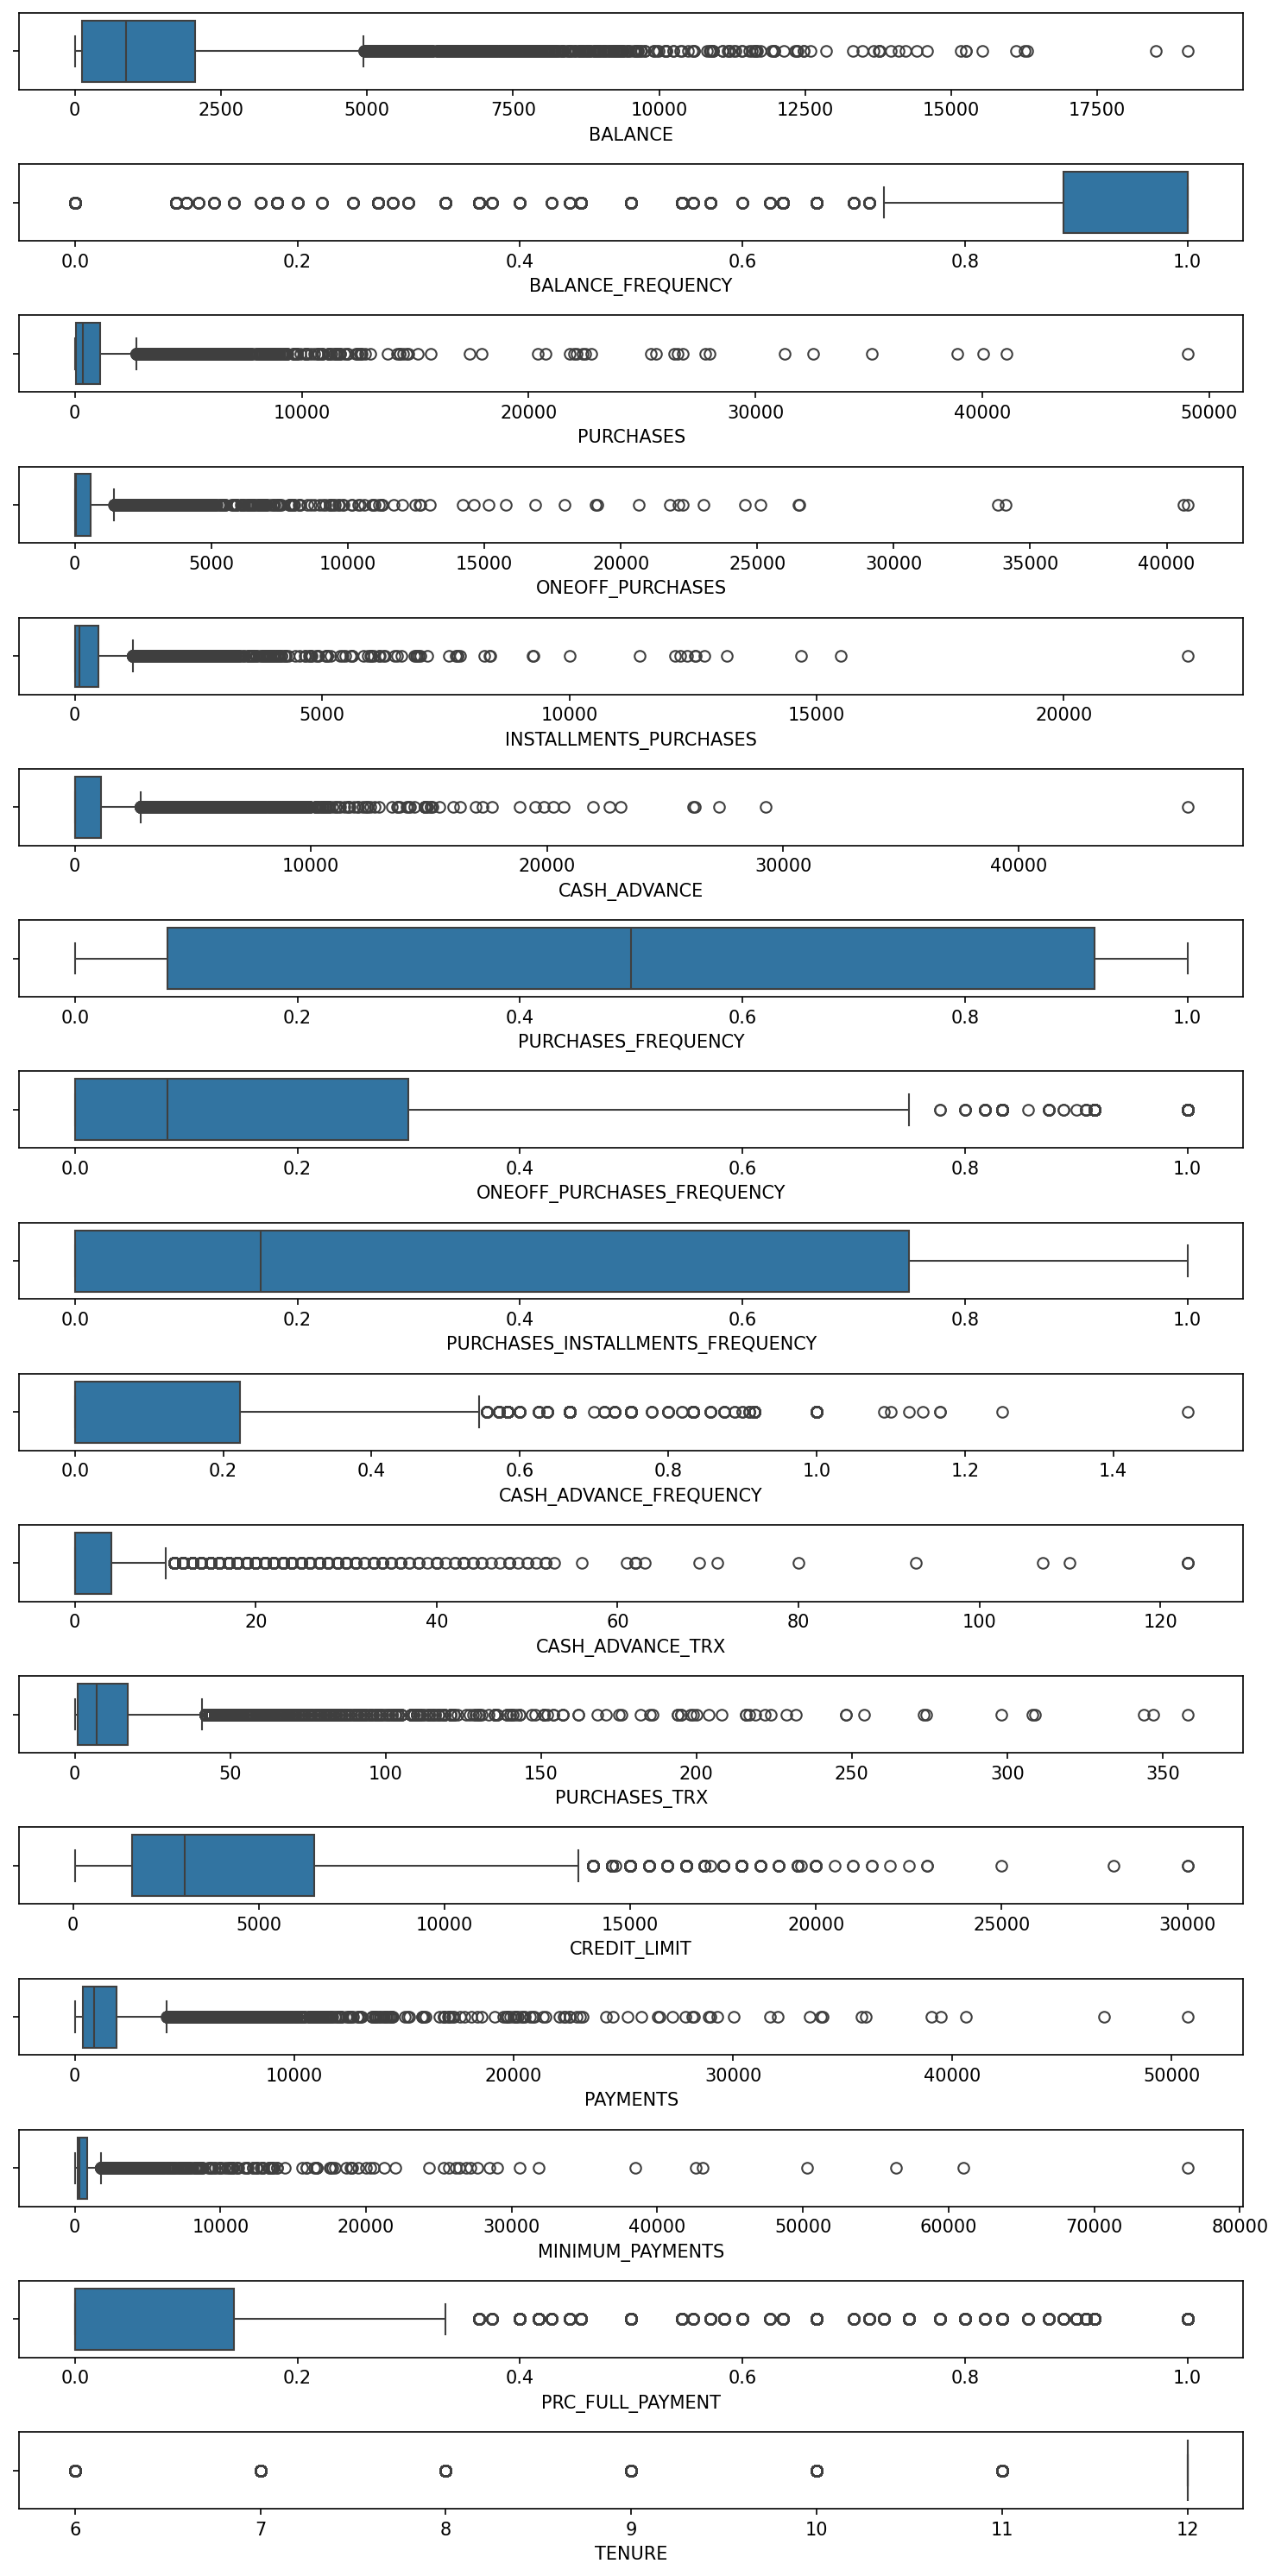

In [21]:
fig, axes = plt.subplots(nrows=len(df.columns) - 1, 
                         figsize=(10, 20),
                         dpi=150)

for ax, column in zip(axes, df.drop("CUST_ID", axis=1).columns):
    sns.boxplot(x=df[column], ax=ax, orient='h')

plt.subplots_adjust(hspace=1.5)
plt.tight_layout()
plt.show()

In [22]:
# most of the variables have outliers, this might need to be handled depending on the clustering algorithm

### Local skewness

In [23]:
df = df.drop("CUST_ID", axis=1) # we don't needs this at all

In [24]:
from sklearn.neighbors import NearestNeighbors

In [25]:
def local_distributions(df, k):
    # Convert dataframe to numpy array
    data = df.values
    
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(data)  # k+1 because the point itself is included
    distances, indices = nbrs.kneighbors(data)
    
    local_distributions = {}
    for c in df.columns:
        local_distributions[c+"_avg"] = []
        local_distributions[c+"_median"] = []
    
    for idx, neighbors in enumerate(indices):
        local_data = data[neighbors[1:]]
        
        for col_idx, col_name in enumerate(df.columns):
            col_values = local_data[:, col_idx]
            local_distributions[col_name+"_avg"].append(np.mean(col_values))
            local_distributions[col_name+"_median"].append(np.median(col_values))
            
    return local_distributions

In [26]:
x = pd.DataFrame(local_distributions(df.dropna(), 4))

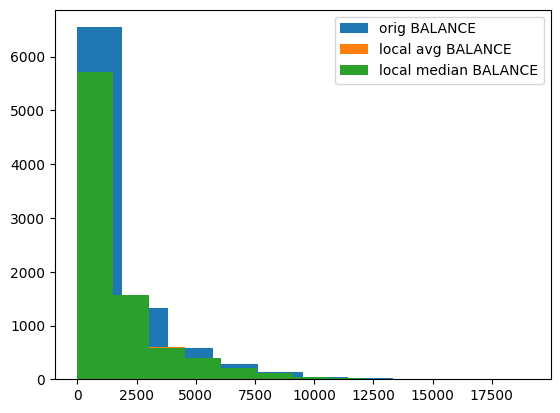

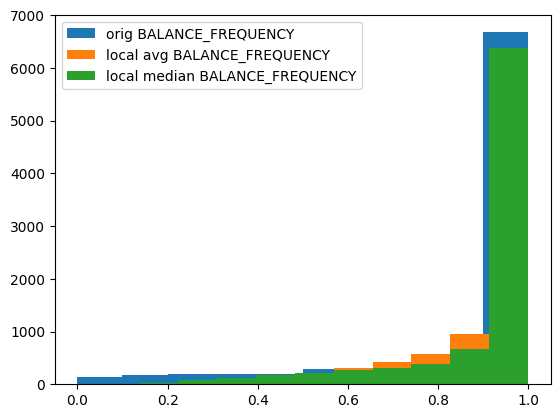

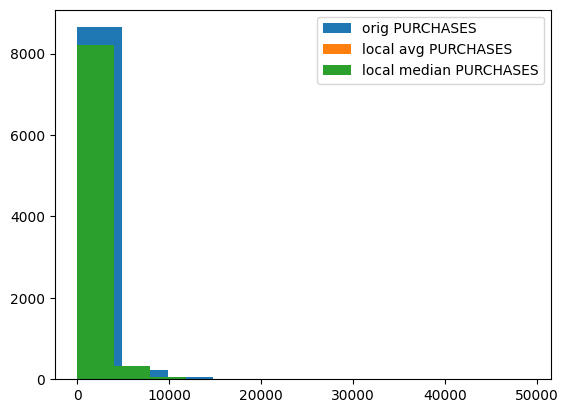

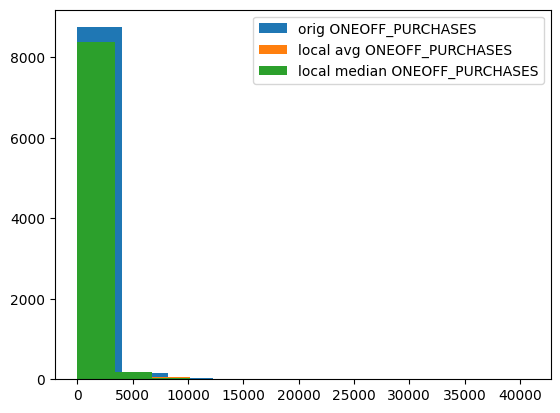

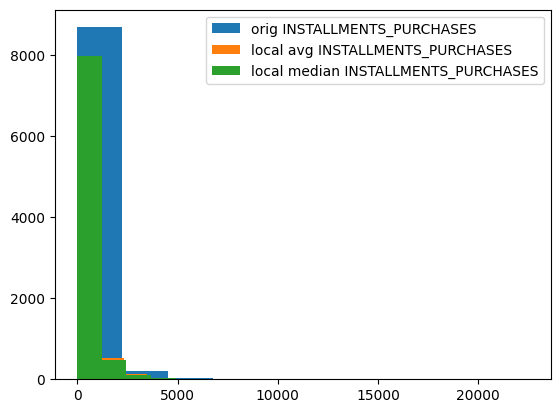

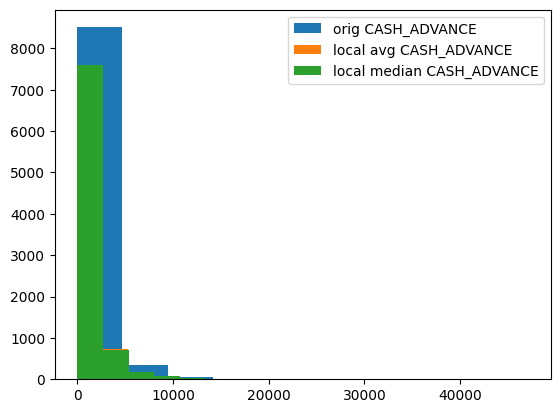

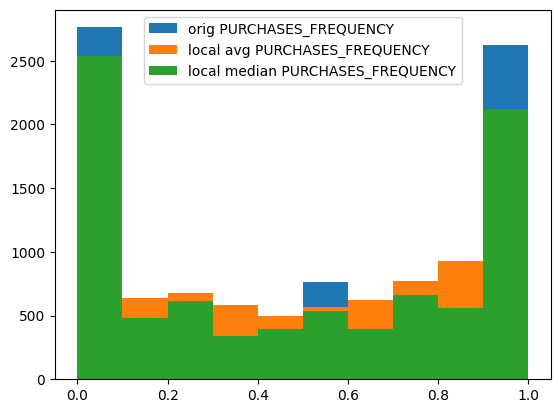

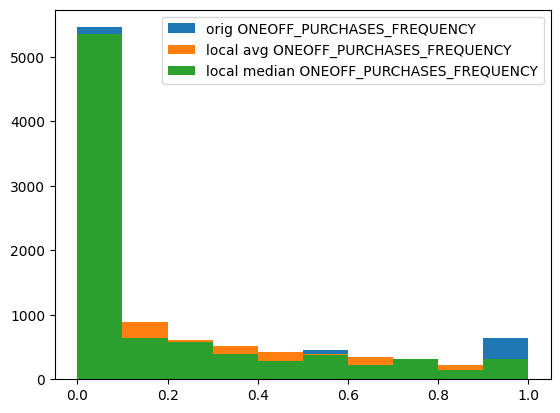

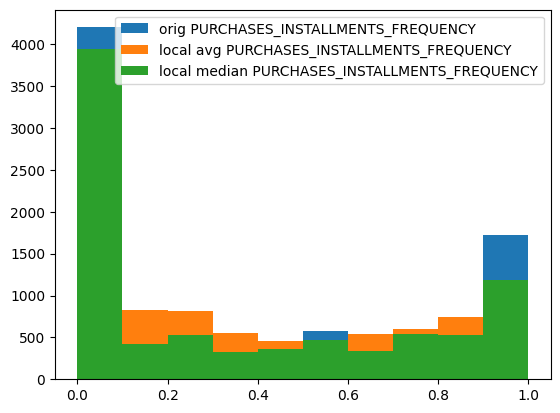

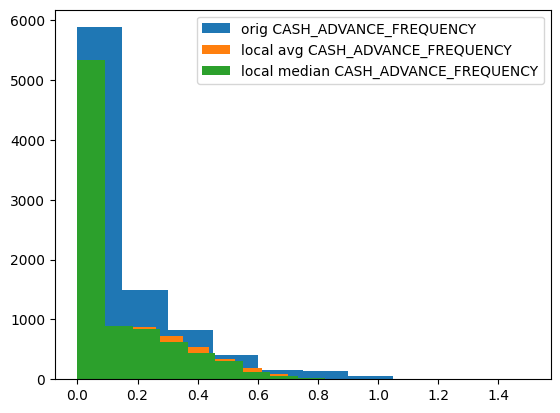

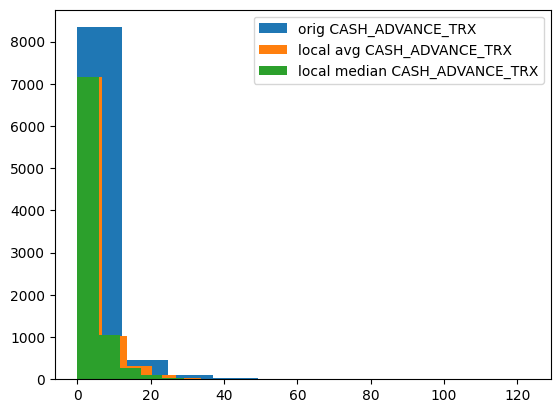

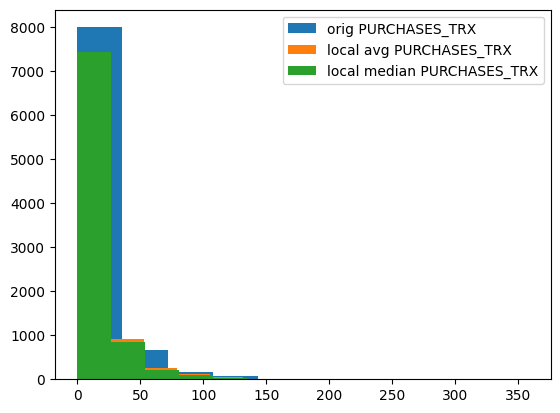

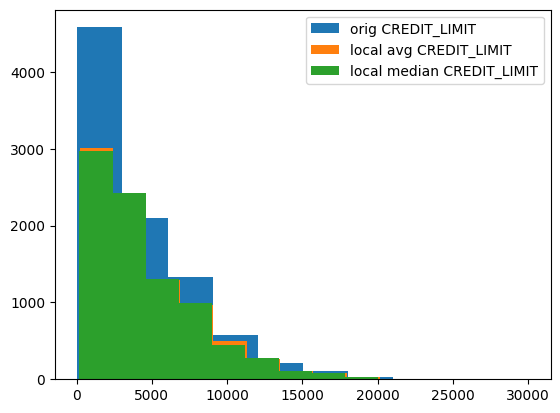

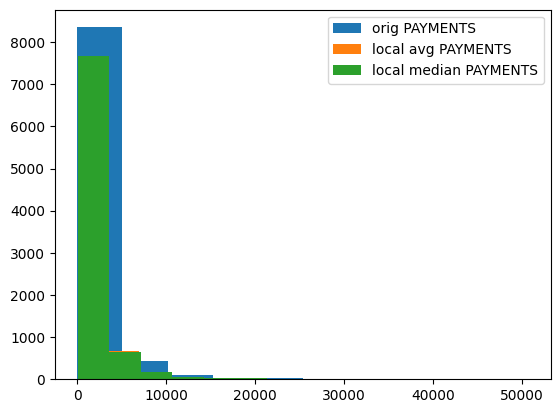

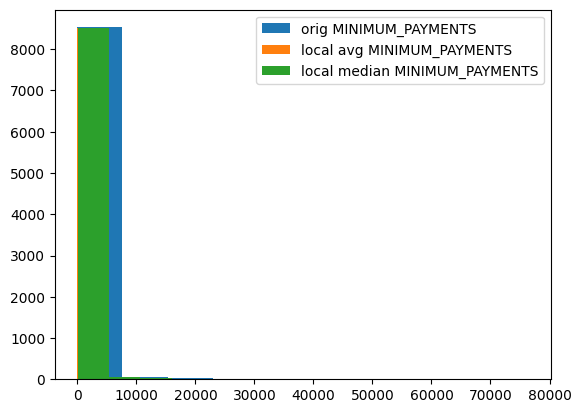

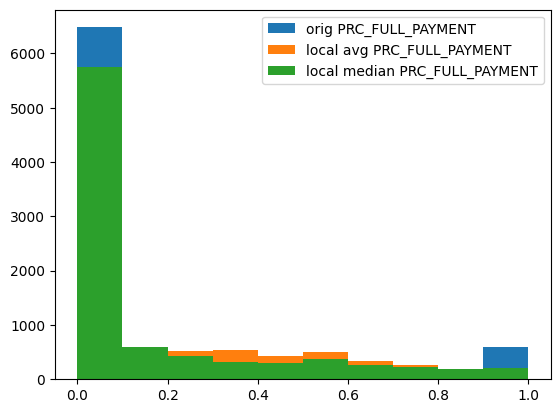

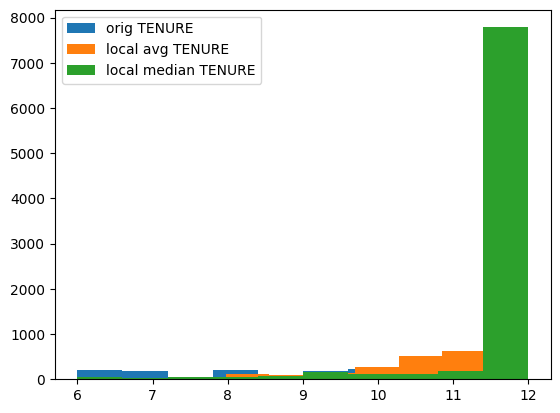

In [27]:
for c in df.columns:
    plt.hist(df[c], label = f"orig {c}")
    plt.hist(x[c+"_avg"], label=f"local avg {c}")
    plt.hist(x[c+"_median"], label = f"local median {c}")
    
    plt.legend()
    plt.show()

In [28]:
# the global variables are skewed but the local distributions' average and median seems to be the same, so KNN average can be used to imput the missing data

## relationship overview

### general

just for a general overview

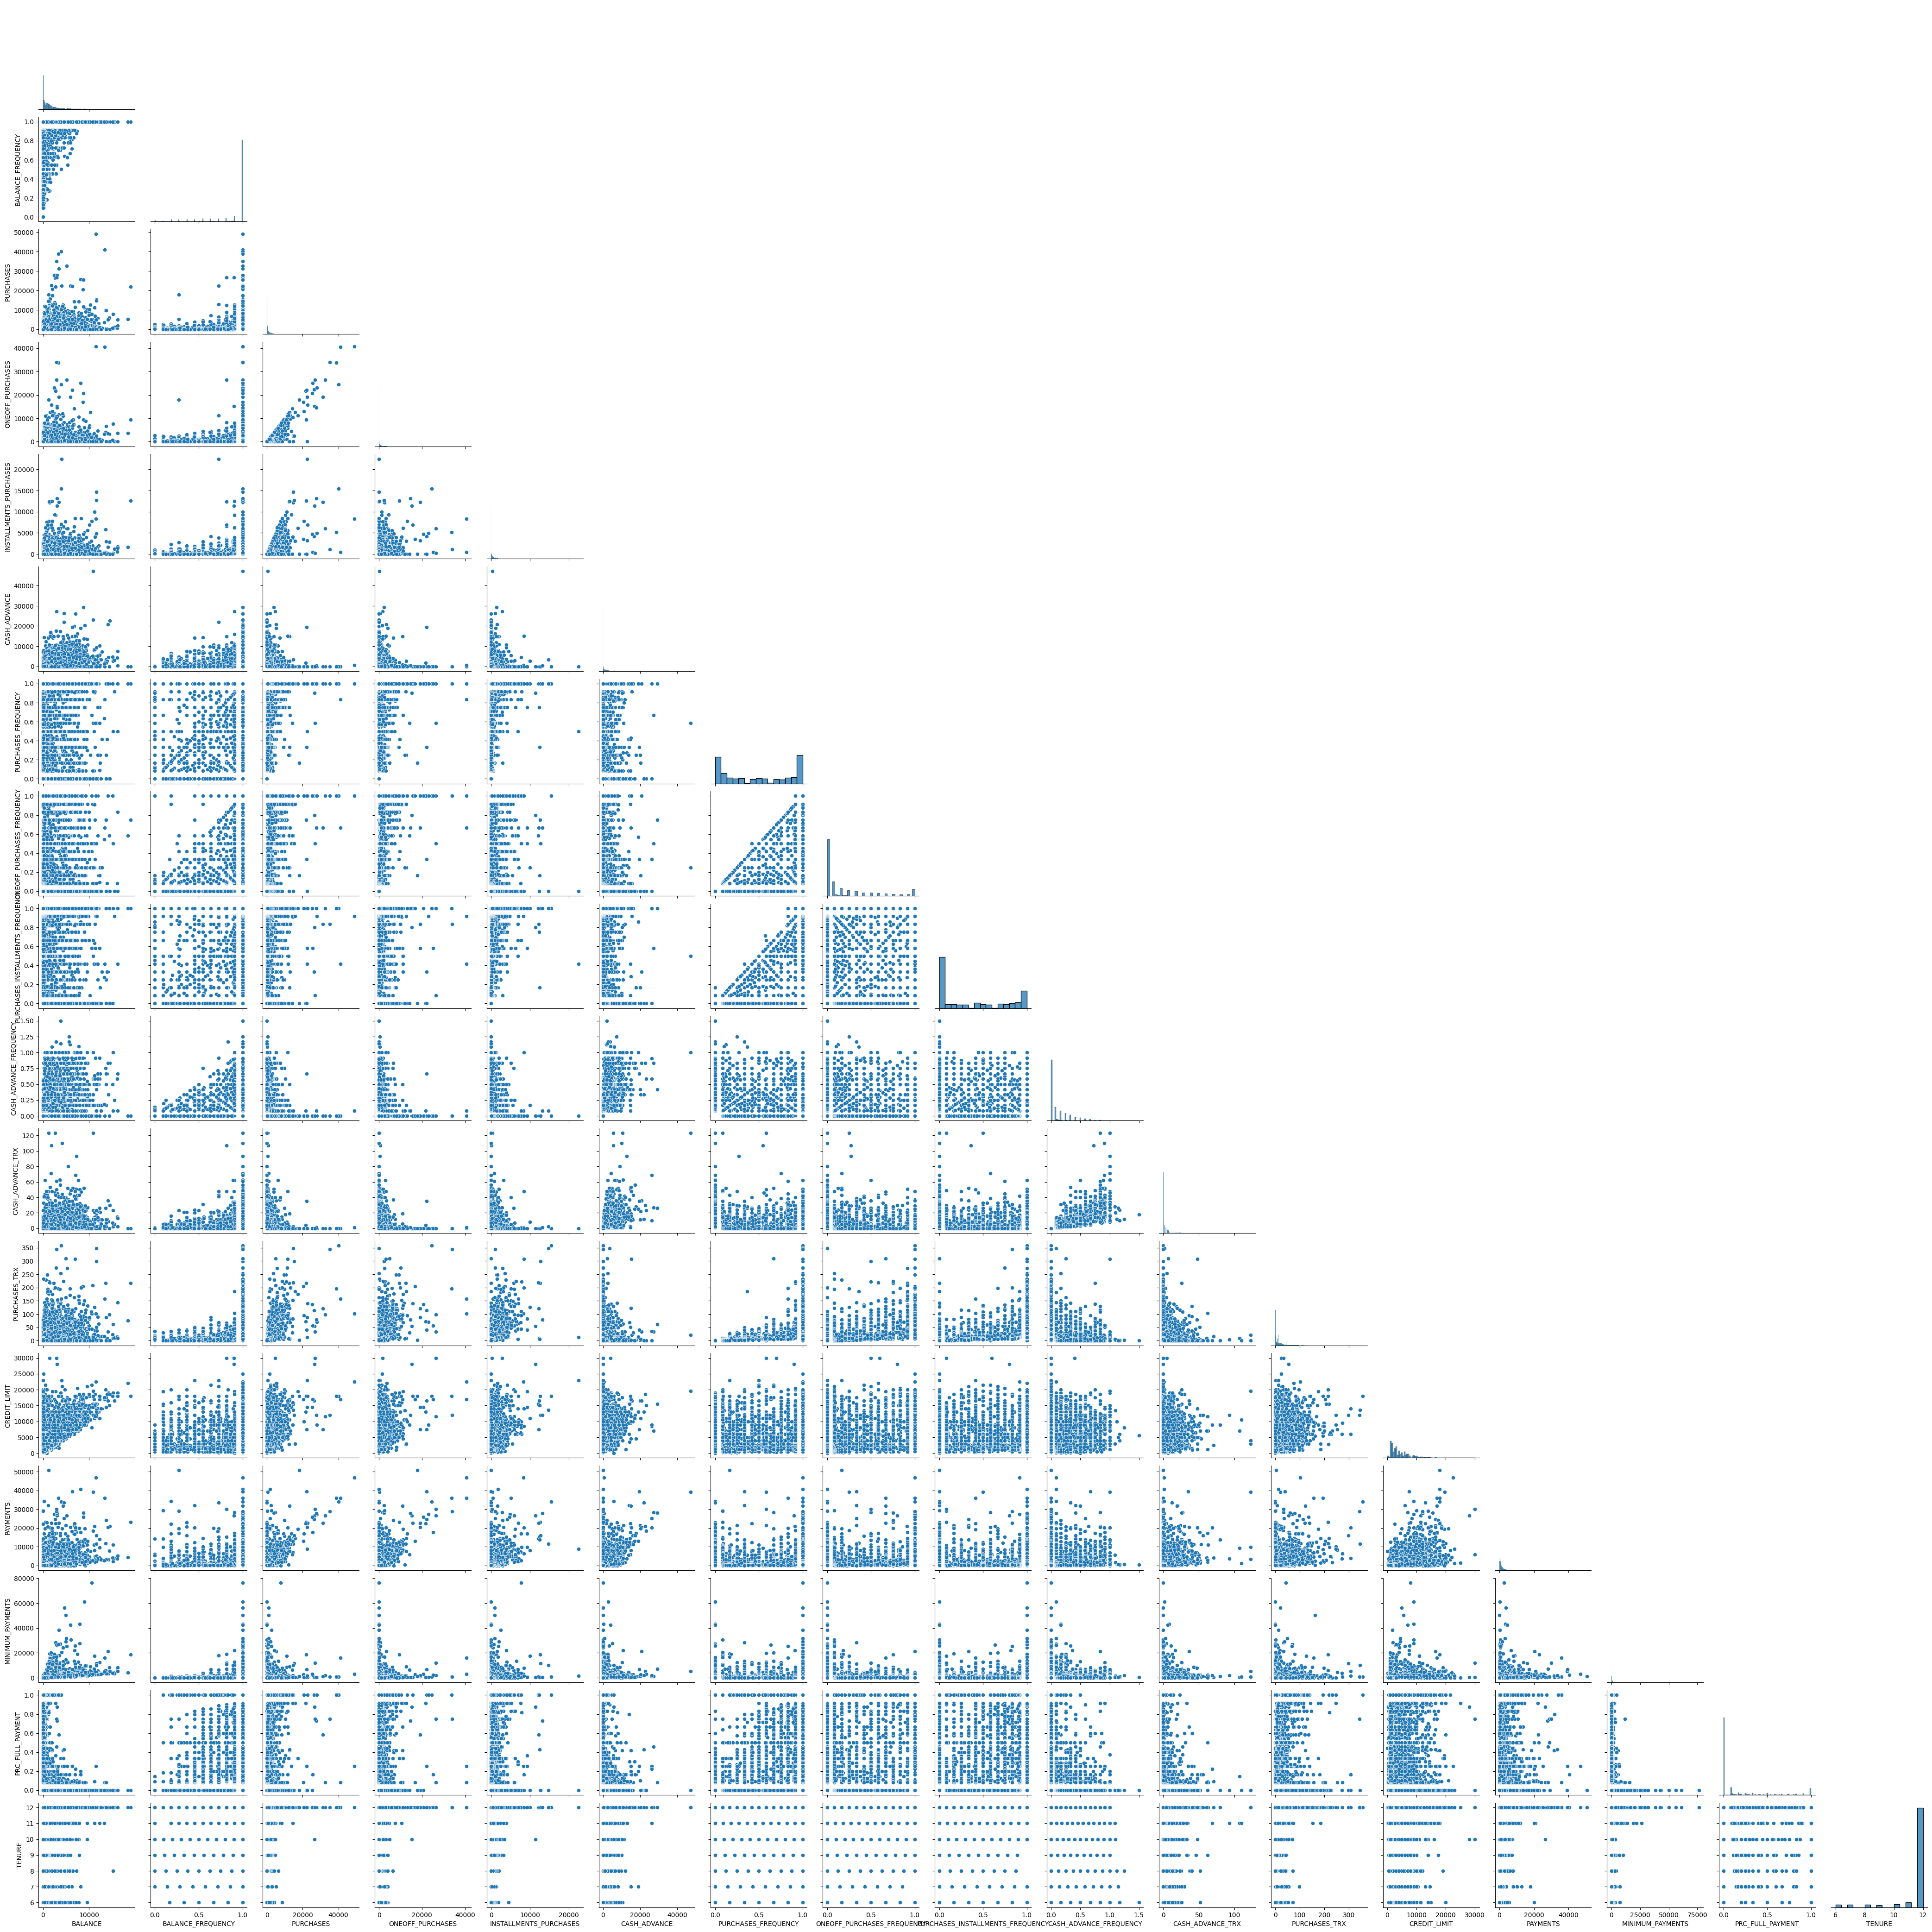

In [29]:
sns.pairplot(df, corner=True) # double click on the image to enlarge it
plt.show()

### int columns only

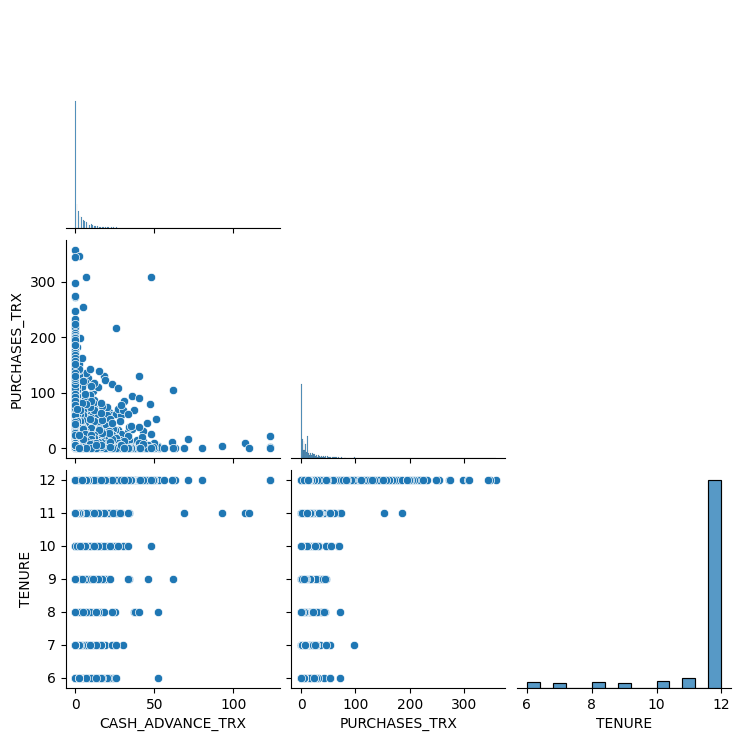

In [30]:
sns.pairplot(df.select_dtypes(int), corner=True) # double click on the image to enlarge it
plt.show()

- from these integer variables TENURE seems like a low cardinality 'categorical' variable
- the others act more like 'regular' numbers, with a not normal distribution -> that need to be dealt with

In [31]:
sum(df["PURCHASES_TRX"] == 0)

2044

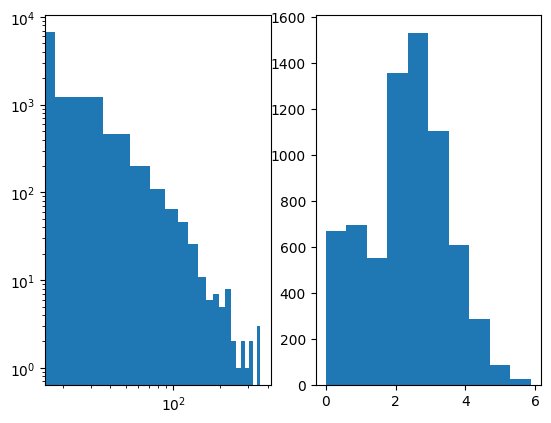

In [32]:
# quick ideation 
plt.subplots(1,2)
plt.subplot(1,2,1)
plt.hist(df["PURCHASES_TRX"], bins=20)
plt.loglog()
plt.subplot(1,2,2)
non_null = df.loc[df["PURCHASES_TRX"] != 0]
plt.hist(np.log(non_null["PURCHASES_TRX"]))
plt.show()

In [33]:
# logarith can make the non-normality dissapear, but then we have to deal with the 0 values

In [34]:
sum(df["CASH_ADVANCE_TRX"] == 0)

4628

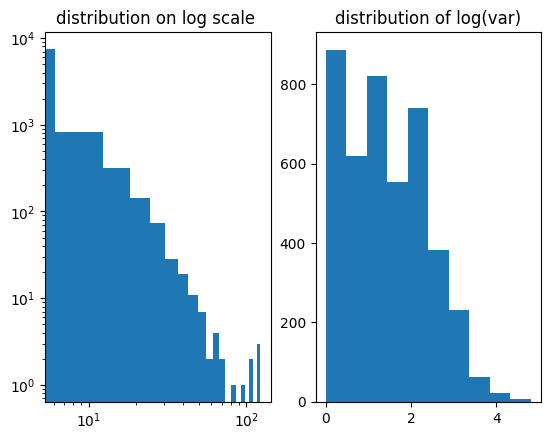

In [35]:
# quick ideation 
plt.subplots(1,2)
plt.subplot(1,2,1)
plt.hist(df["CASH_ADVANCE_TRX"], bins=20)
plt.title("distribution on log scale ")
plt.loglog()
plt.subplot(1,2,2)
non_null = df.loc[df["CASH_ADVANCE_TRX"] != 0]
plt.title("distribution of log(var)")
plt.hist(np.log(non_null["CASH_ADVANCE_TRX"]))
plt.show()

In [36]:
# not so nice, but still better distribution than original

### float values

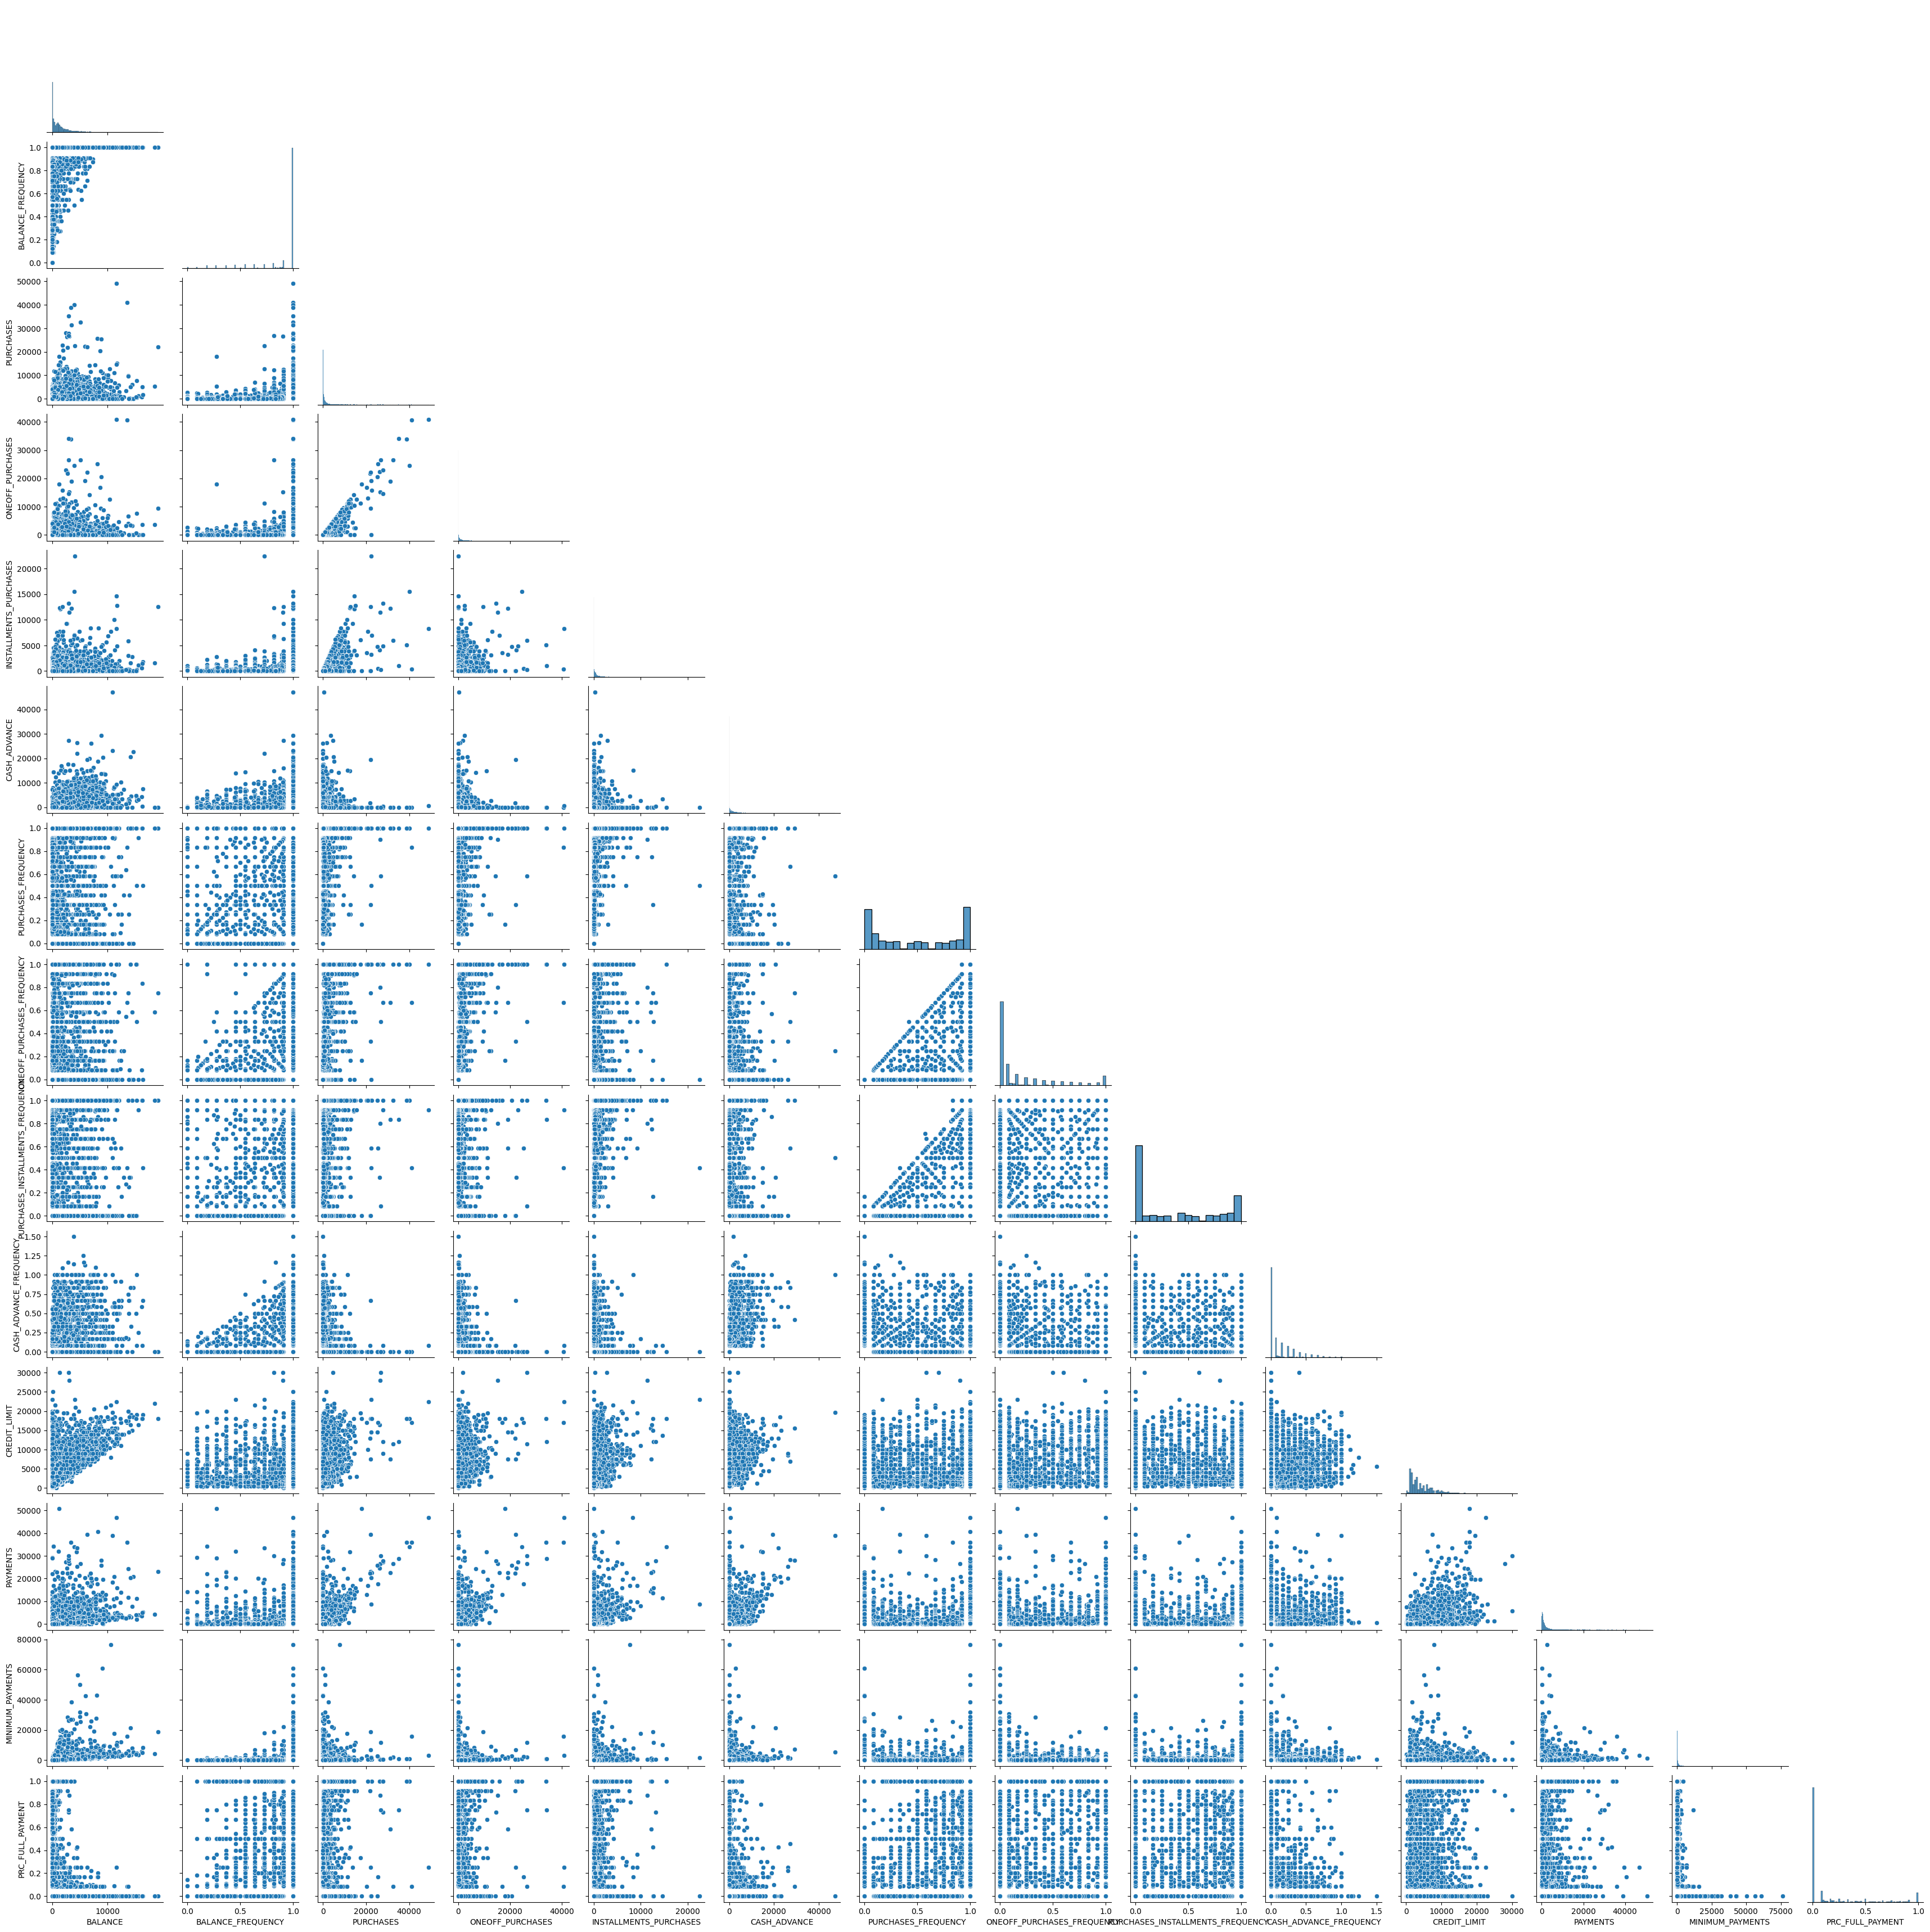

In [37]:
sns.pairplot(df.select_dtypes(float), corner=True) # double click on the image to enlarge it
plt.show()

- there are obviously correlated variables: PURCHASE - ONEOFF PURCHASE
- the *_FREQUENCY cols looks like a discrete variable between 0 < f < 1

In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## visualization

In [39]:
def visualize_PCA(df: pd.DataFrame, scale = True, clusters: pd.Series = None) -> None:
    """visualize dataframe using PCA, color clusters if given"""
    df = df.dropna()
    
    if scale:
        df = pd.DataFrame(StandardScaler().fit_transform(df))
    
    df = PCA(n_components=2, random_state=24).fit_transform(df)

    if clusters is None:
        clusters = pd.Series([0 for _ in range(len(df))])
    
    for i in clusters.unique():
        cluster_points_mask = clusters == i
        plt.scatter(df[cluster_points_mask, 0], df[cluster_points_mask, 1], marker=".", label=f"cluster {i}", alpha=0.5)
    plt.xlabel("dim1")
    plt.ylabel("dim2")
    plt.legend()

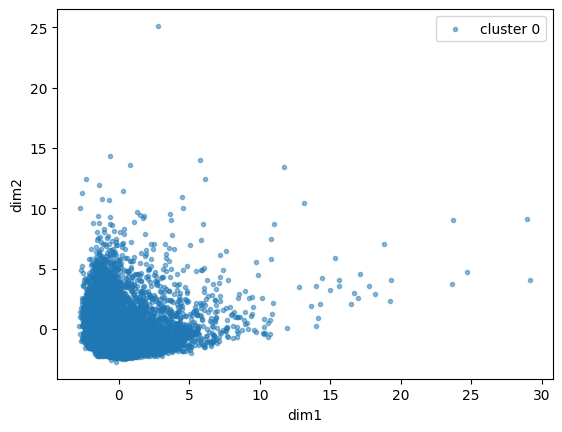

In [40]:
visualize_PCA(df)
# visualization of the population

In [41]:
import random

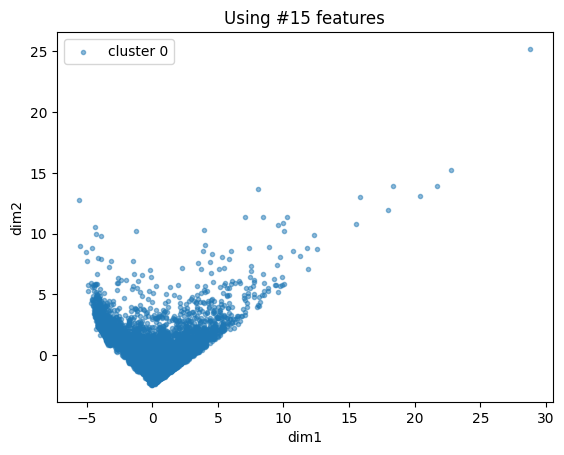

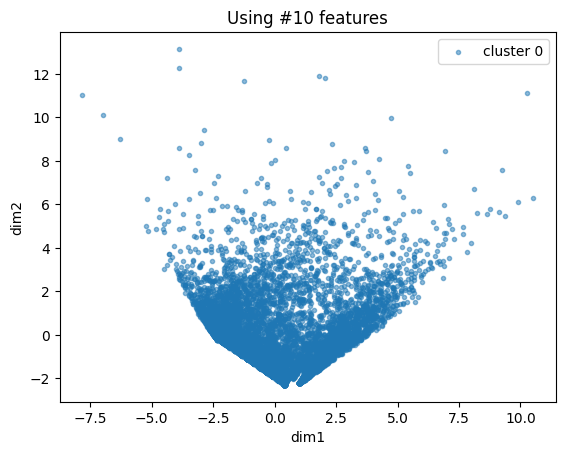

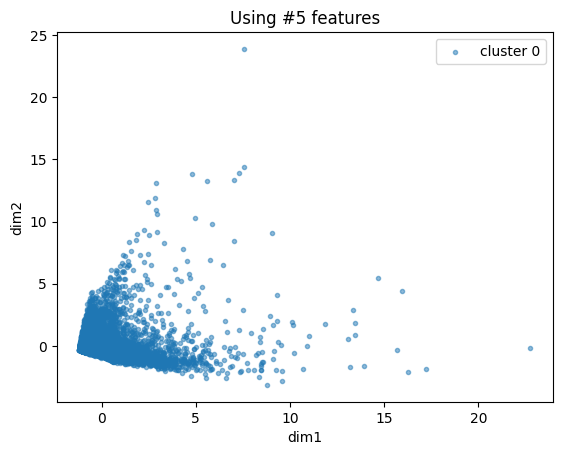

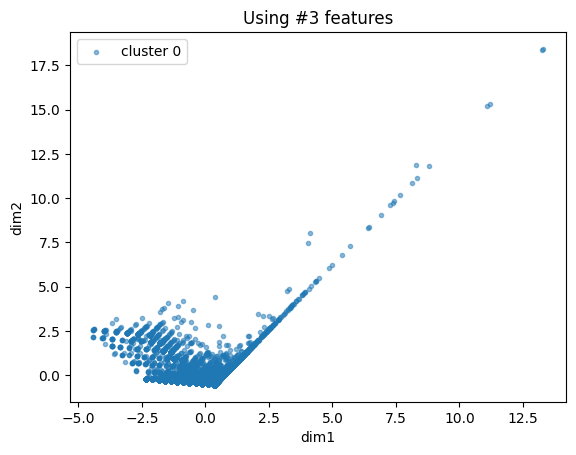

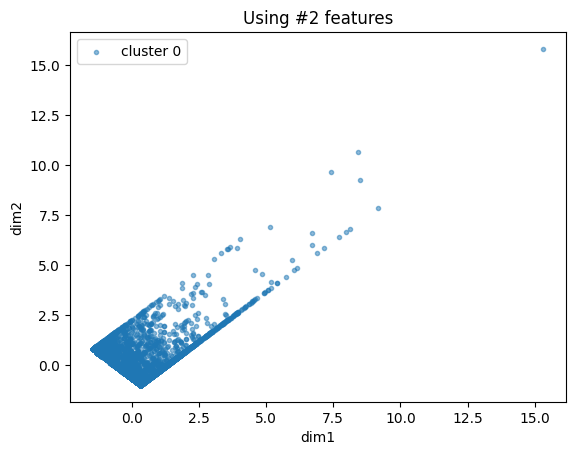

In [42]:
# robustness of the plot

for i in [15, 10, 5, 3, 2]:
    rand_cols = random.choices(df.columns, k=i)
    plt.title(f"Using #{i} features")
    visualize_PCA(df[rand_cols])
    plt.show()

Looks like this visualization is really sensitive to the columns, so far-reaching conclusions cannot be drawn from this plot.
Most probably we can use for double check whether the clusters' point are close to each other but thats all. 

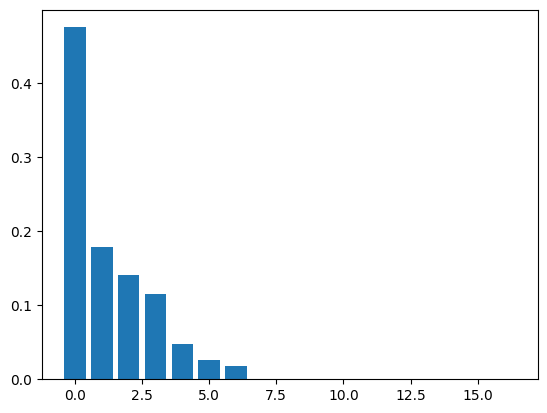

In [43]:
_pca = PCA( random_state=24)
_pca.fit(df.dropna())

plt.bar(range(len(_pca.explained_variance_ratio_)),_pca.explained_variance_ratio_)
plt.show()

In [44]:
# the first 2 dim should explain ~70% of the variance

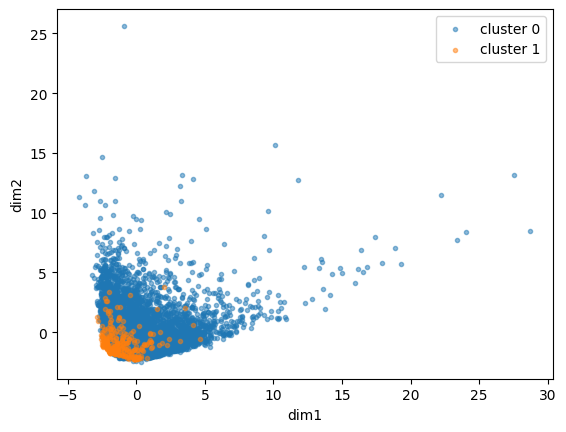

In [45]:
# missing values
_clusters = df.isna().any(axis=1).astype(int)
_df = df.drop(["CREDIT_LIMIT", "MINIMUM_PAYMENTS"], axis=1)
visualize_PCA(_df, clusters = _clusters)

In [46]:
# these missing values are where the most of the record, but they seem to be close to each other

## Feature engineering based on EDA

In [47]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [48]:
df = pd.read_csv(zf.open('CC_GENERAL.csv')).drop("CUST_ID", axis=1)


def imput(df):
    missing_cols = df.columns[df.isnull().any()]
    
    df_imputed = pd.DataFrame(KNNImputer().fit_transform(df[missing_cols]), columns=missing_cols)
    df = df.fillna(df_imputed)
    return df

def scale(df):
    scaler = MinMaxScaler()
    scaler.fit(df)
    df = pd.DataFrame(scaler.transform(df), columns = scaler.get_feature_names_out())
    return df

In [49]:
scale_and_imputted_df = scale(imput(df))

In [50]:
scale_and_imputted_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.002148           0.818182   0.001945          0.000000   
1  0.168169           0.909091   0.000000          0.000000   
2  0.131026           1.000000   0.015766          0.018968   
3  0.087521           0.636364   0.030567          0.036775   
4  0.042940           1.000000   0.000326          0.000393   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                 0.00424      0.000000             0.166667   
1                 0.00000      0.136685             0.000000   
2                 0.00000      0.000000             1.000000   
3                 0.00000      0.004366             0.083333   
4                 0.00000      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000           0.00000       0.005587      0.031720   
1                0.166667           0.03252       0.000000      0.232053   
2                0.000000           0.00000       0.033520      0.248748   
3                0.055555           0.00813       0.002793      0.248748   
4                0.000000           0.00000       0.002793      0.038397   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  0.003979          0.001826          0.000000     1.0  
1  0.080893          0.014034          0.222222     1.0  
2  0.012264          0.008210          0.000000     1.0  
3  0.000000          0.015914          0.000000     1.0  
4  0.013374          0.003204          0.000000     1.0

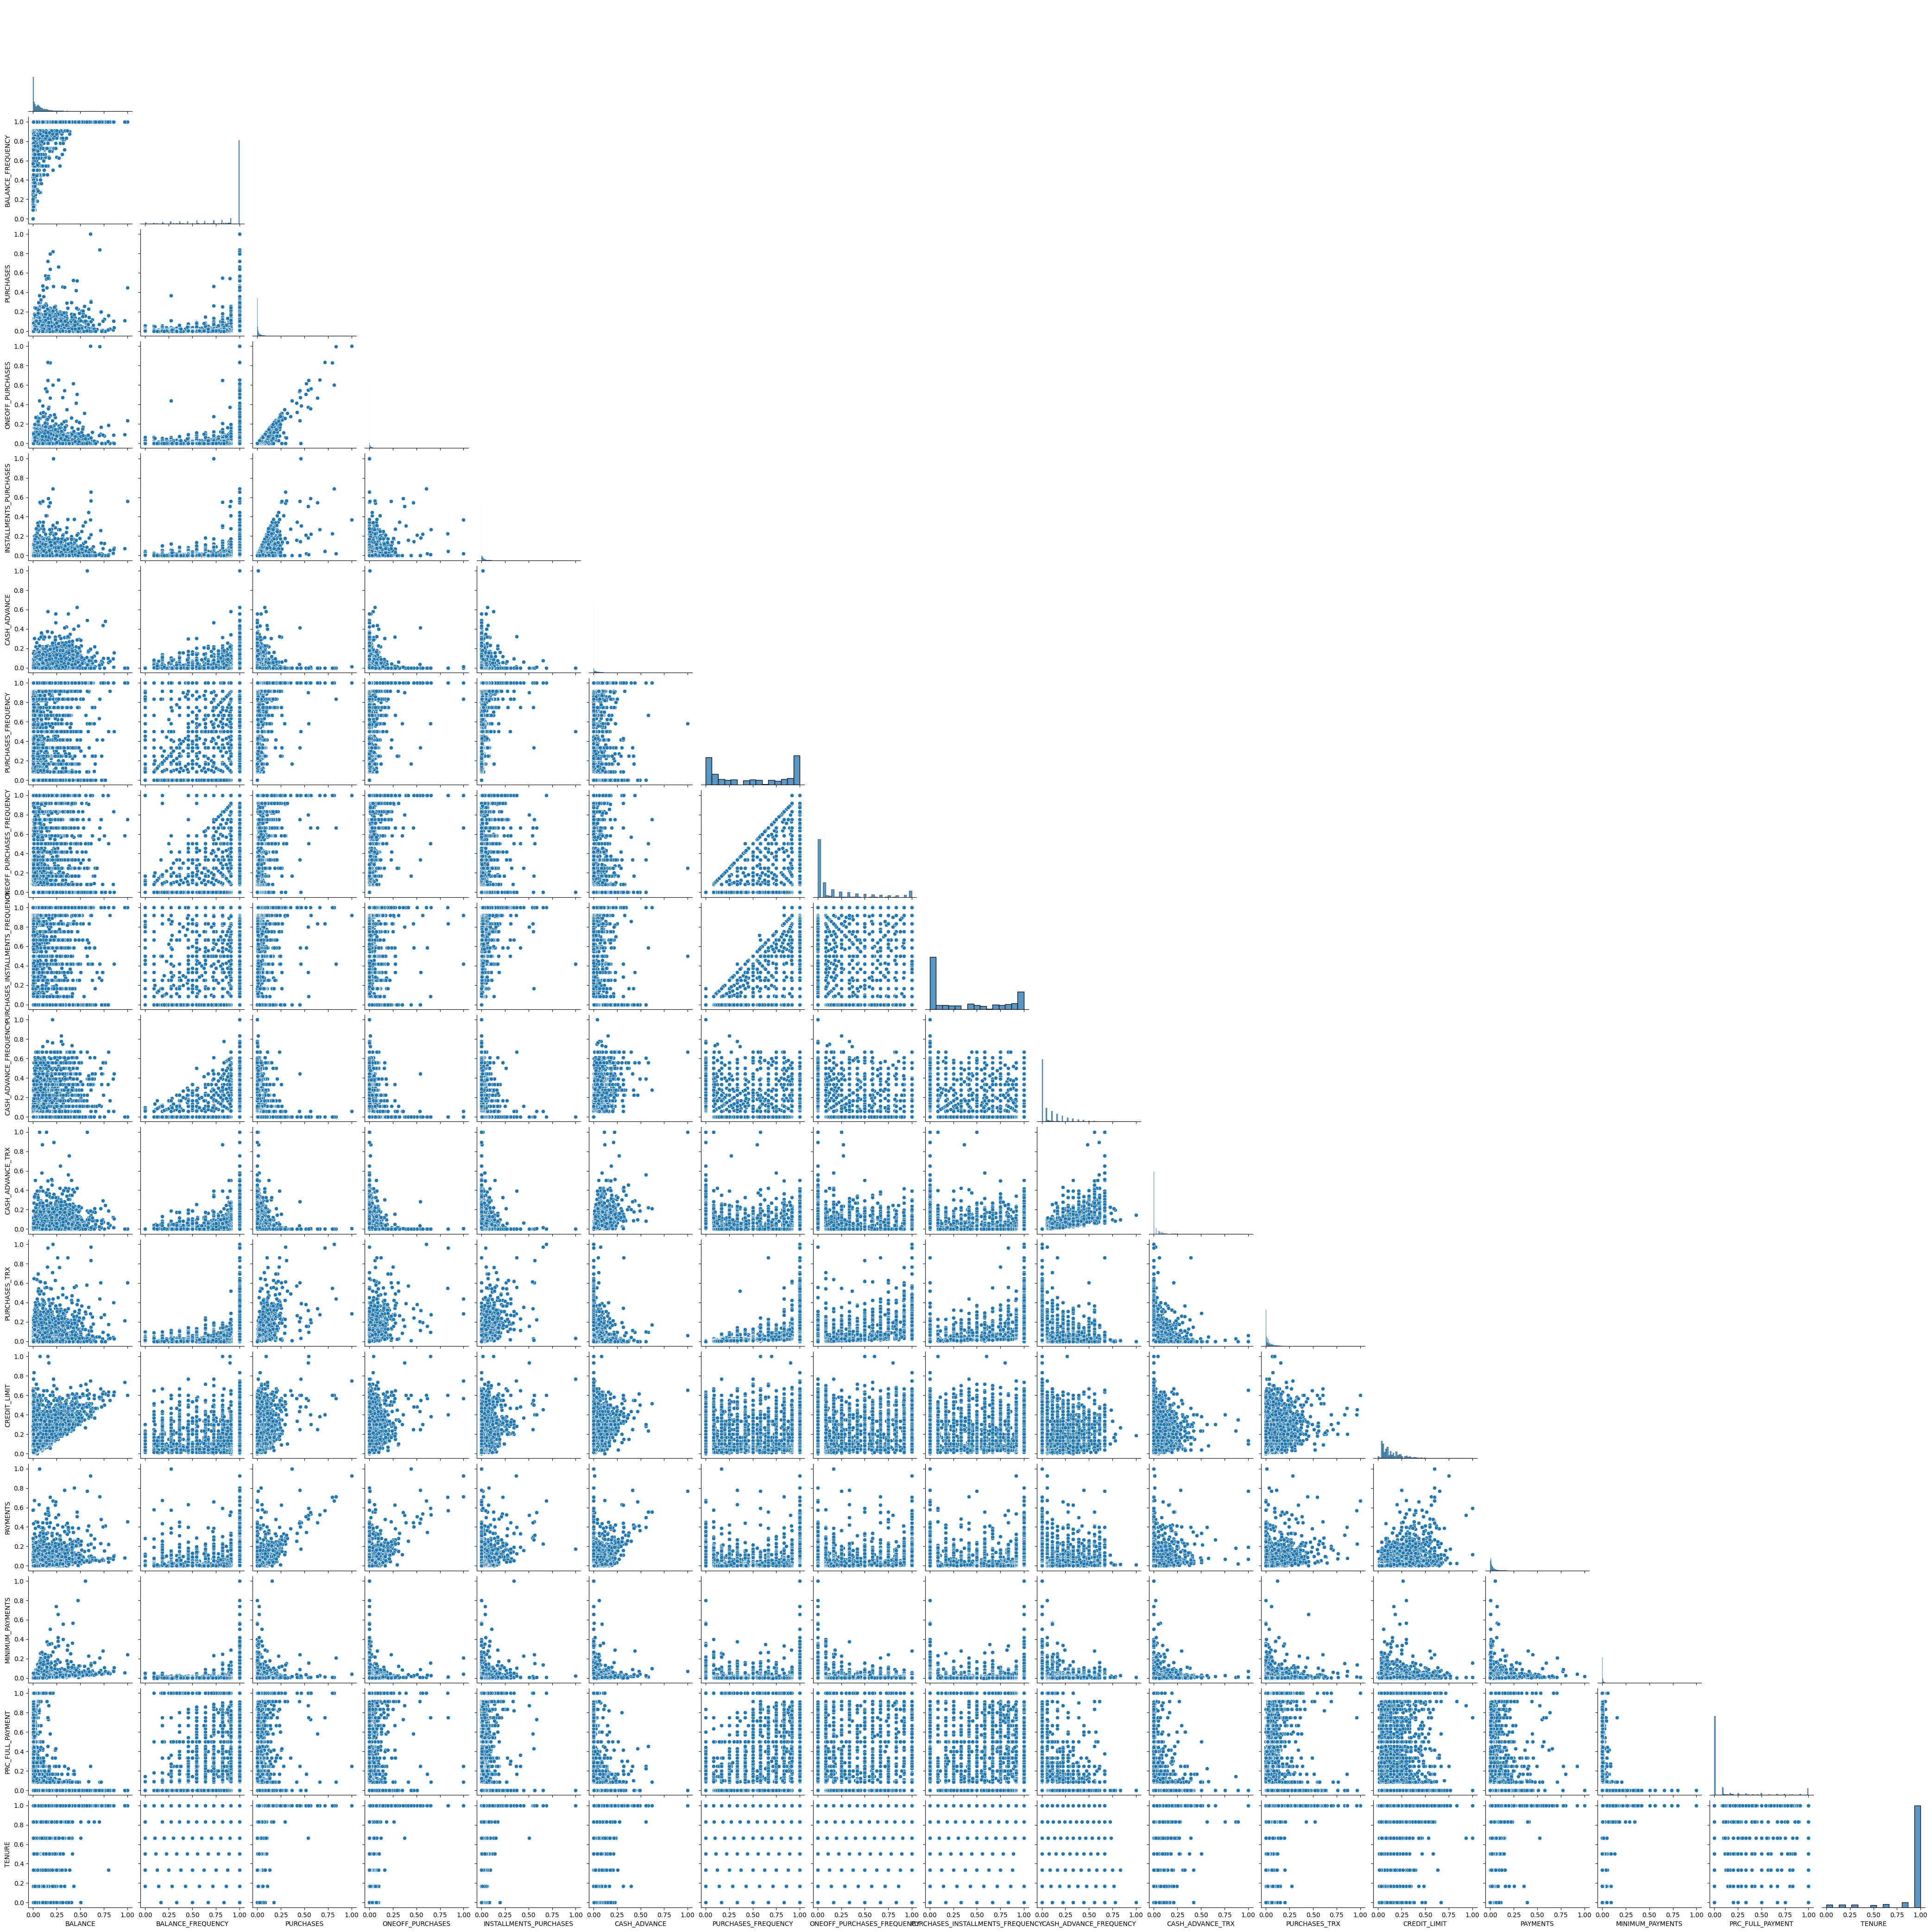

In [51]:
sns.pairplot(scale_and_imputted_df, corner=True) # double click on the image to enlarge it
plt.show()

In [52]:
scale_and_imputted_df.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  8950.000000        8950.000000  8950.000000       8950.000000   
mean      0.082154           0.877271     0.020457          0.014534   
std       0.109306           0.236904     0.043570          0.040722   
min       0.000000           0.000000     0.000000          0.000000   
25%       0.006736           0.888889     0.000808          0.000000   
50%       0.045864           1.000000     0.007367          0.000932   
75%       0.107868           1.000000     0.022637          0.014166   
max       1.000000           1.000000     1.000000          1.000000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean                 0.018270      0.020766             0.490351   
std                  0.040193      0.044491             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                  0.003956      0.000000             0.500000   
75%                  0.020828      0.023629             0.916667   
max                  1.000000      1.000000             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.090096          0.026413       0.041089      0.148390   
std                  0.133414          0.055485       0.069435      0.121491   
min                  0.000000          0.000000       0.000000      0.000000   
25%                  0.000000          0.000000       0.002793      0.051753   
50%                  0.000000          0.000000       0.019553      0.098497   
75%                  0.148148          0.032520       0.047486      0.215359   
max                  1.000000          1.000000       1.000000      1.000000   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count  8950.000000       8950.000000       8950.000000  8950.000000  
mean      0.034170          0.011369          0.153715     0.919553  
std       0.057078          0.030617          0.292499     0.223055  
min       0.000000          0.000000          0.000000     0.000000  
25%       0.007556          0.002234          0.000000     1.000000  
50%       0.016894          0.004255          0.000000     1.000000  
75%       0.037482          0.011125          0.142857     1.000000  
max       1.000000          1.000000          1.000000     1.000000

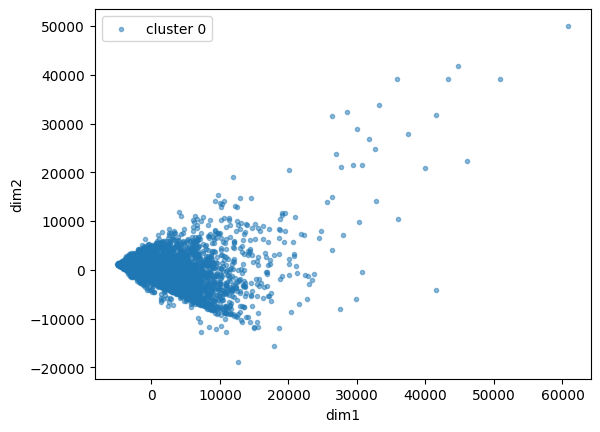

In [53]:
visualize_PCA(df, scale=False)

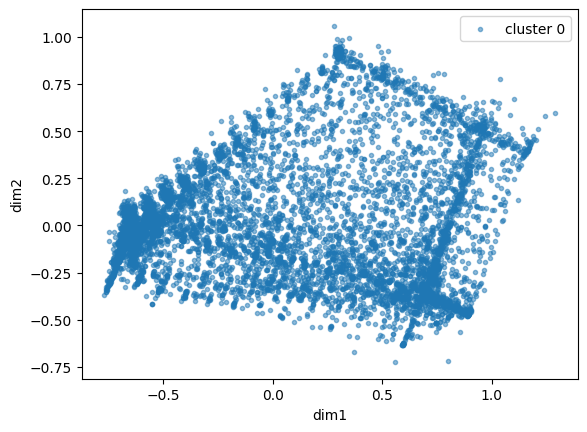

In [54]:
visualize_PCA(scale_and_imputted_df, scale=False)

## Clustering

In [55]:
from sklearn.cluster import KMeans, DBSCAN

I choose to not use elbow methods, because I dont consider them good, because they're not robust enough the results are incidental
I think we cannot avoid to do the whole analysis of the clusters for different 'k's, or we can restrict them by chosing the number of cluster
by some business decision: e.g.: we only have resource to analyze 3 cluster max.

https://en.wikipedia.org/wiki/Elbow_method_(clustering)#Criticism

### Kmeans

K means is really sensitive to outliers:

In [56]:
def remove_outliers(df):
    means = df.mean()
    stds = df.std()
    mask = ((df - means).abs() <= 2.5 * stds).all(axis=1)
    df_filtered = df[mask]
    return df_filtered

In [57]:
len(remove_outliers(imput(df))) - len(df)

-2988

In [58]:
_df = imput(df)
_df = scale(remove_outliers(_df))

In [59]:
km2 = KMeans(random_state=32, max_iter=500, n_clusters= 2)
km3 = KMeans(random_state=32, max_iter=500, n_clusters= 3)
km4 = KMeans(random_state=32, max_iter=500, n_clusters= 4)

cluster2 = pd.Series(km2.fit_predict(_df))
cluster3 = pd.Series(km3.fit_predict(_df))
cluster4 = pd.Series(km4.fit_predict(_df))

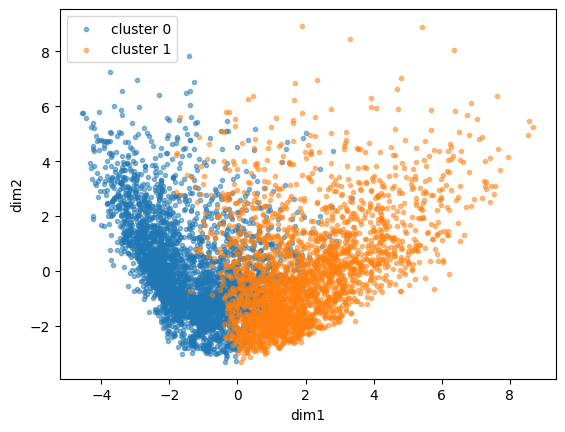

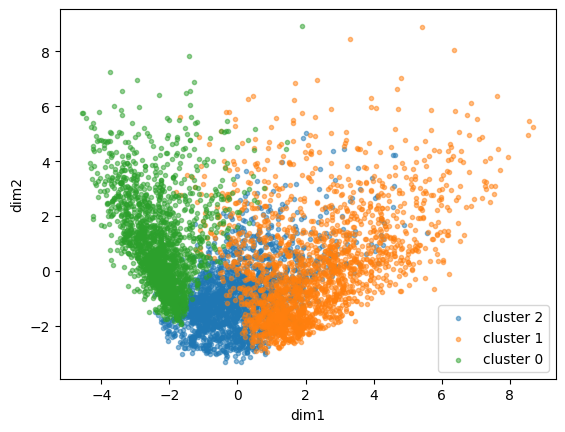

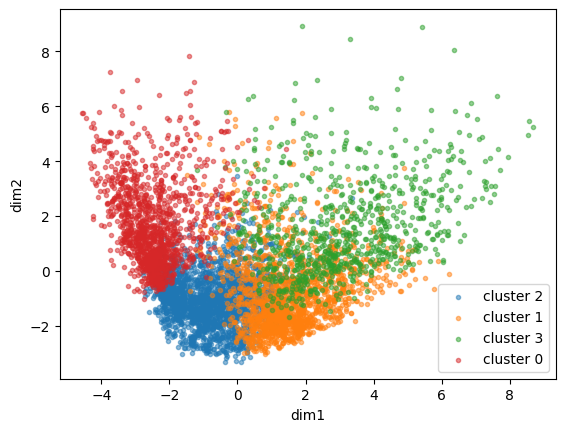

In [60]:
visualize_PCA(_df, scale=True, clusters=cluster2)
plt.show()
visualize_PCA(_df, scale=True, clusters=cluster3)
plt.show()
visualize_PCA(_df, scale=True, clusters=cluster4)
plt.show()

In [61]:
# the clusters overlap
# lets work with k=4 for now

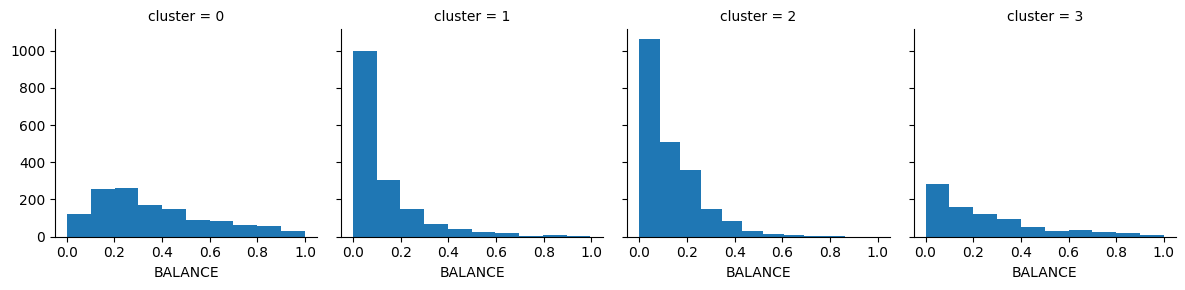

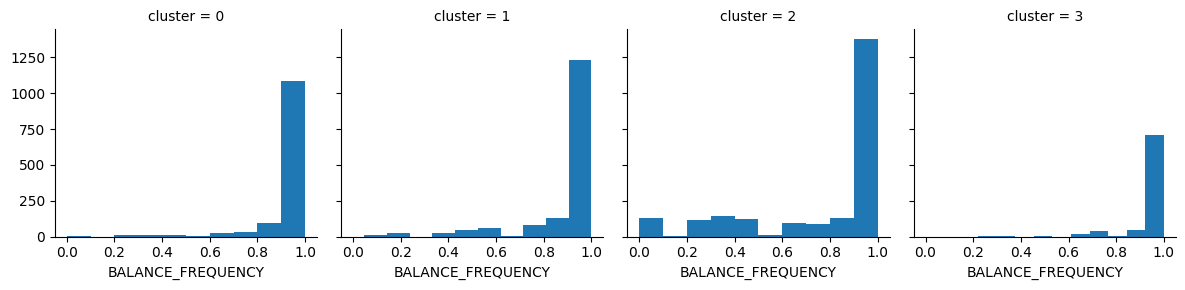

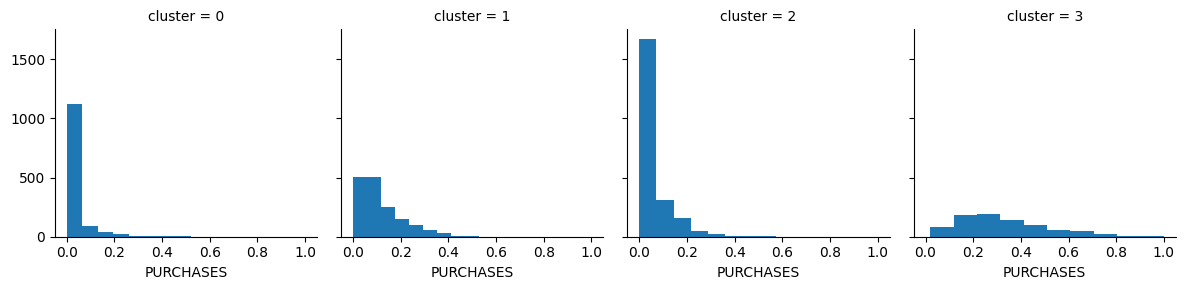

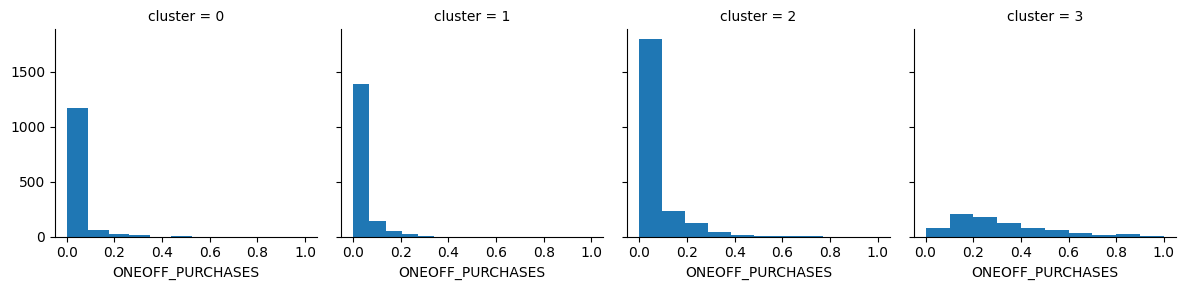

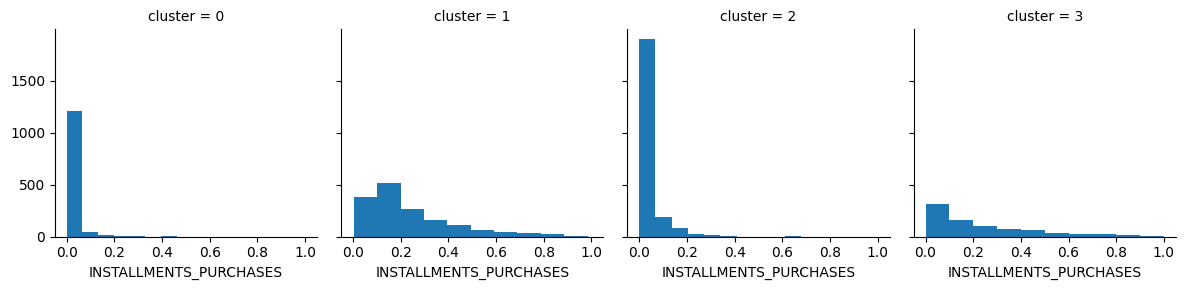

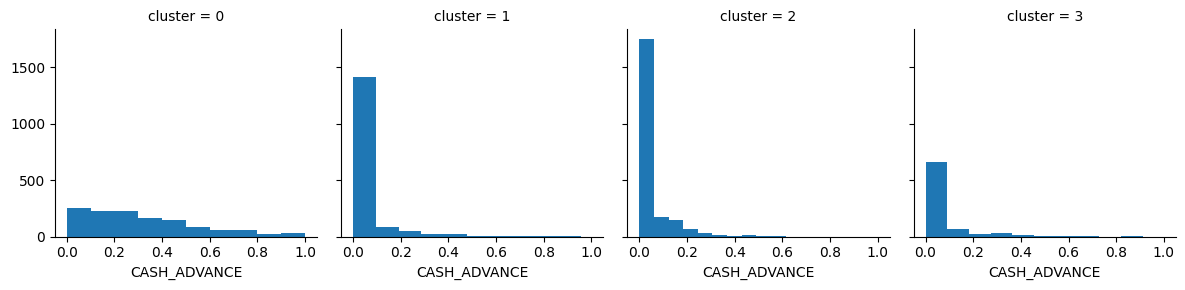

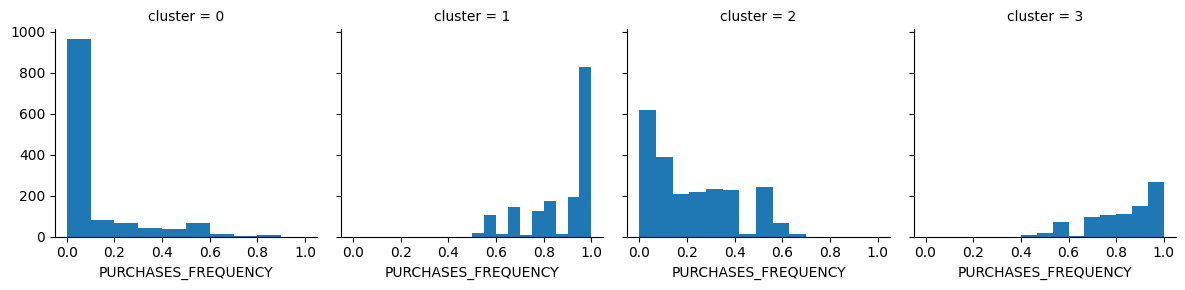

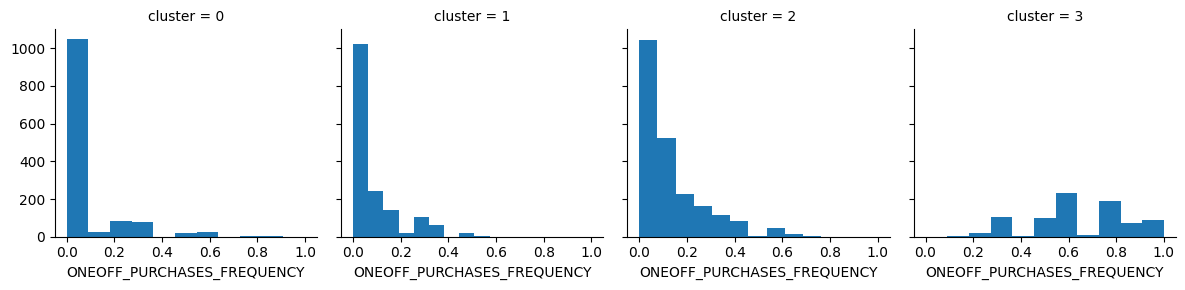

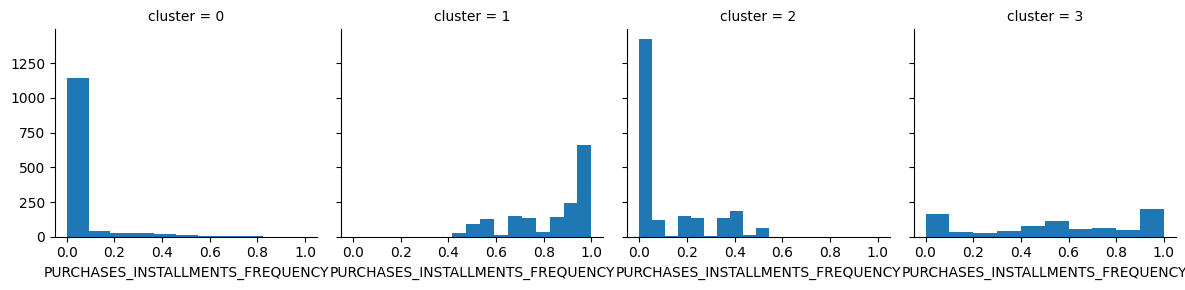

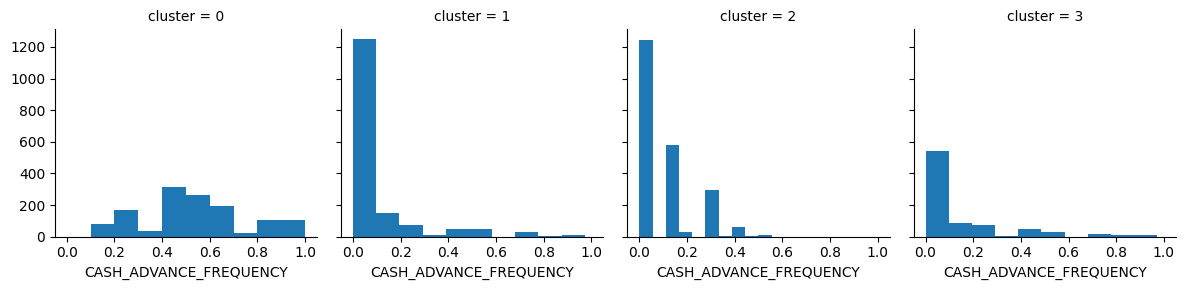

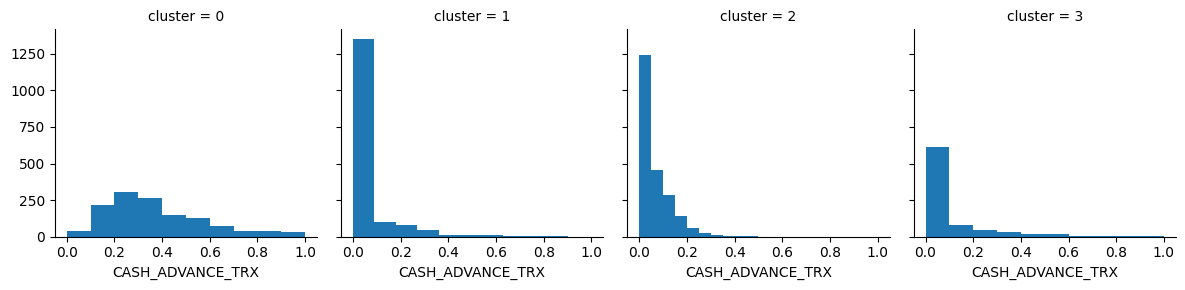

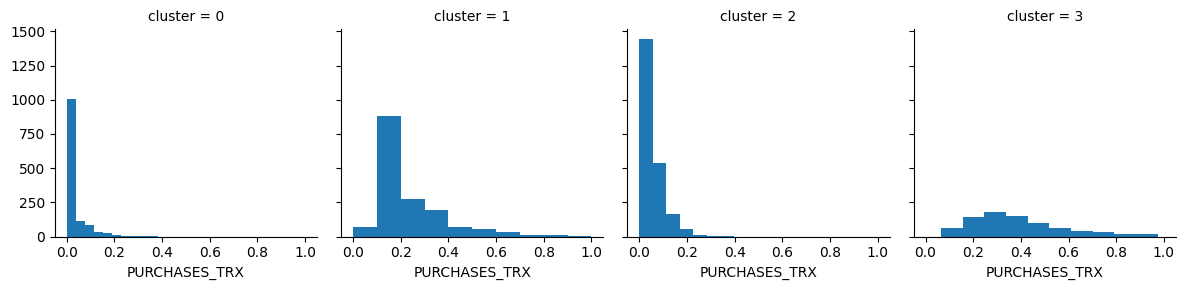

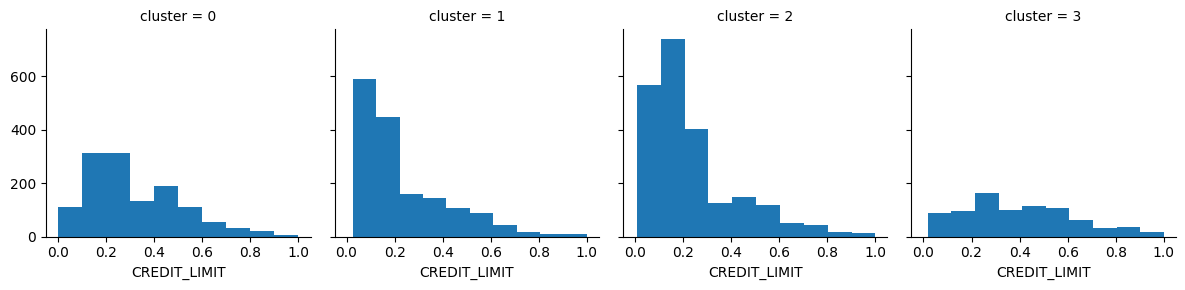

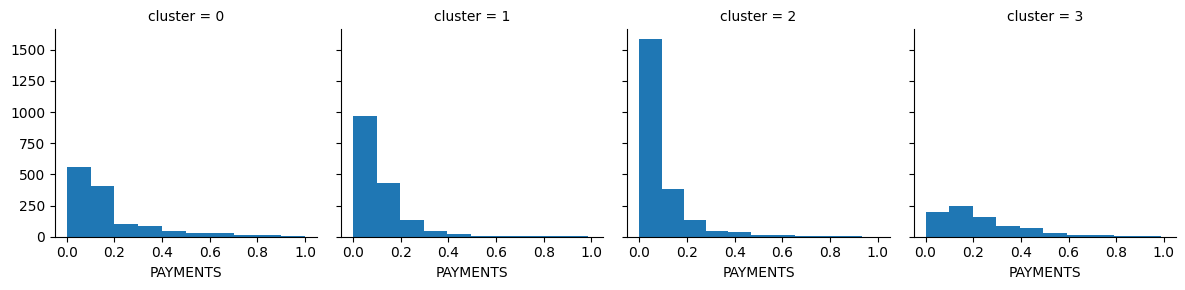

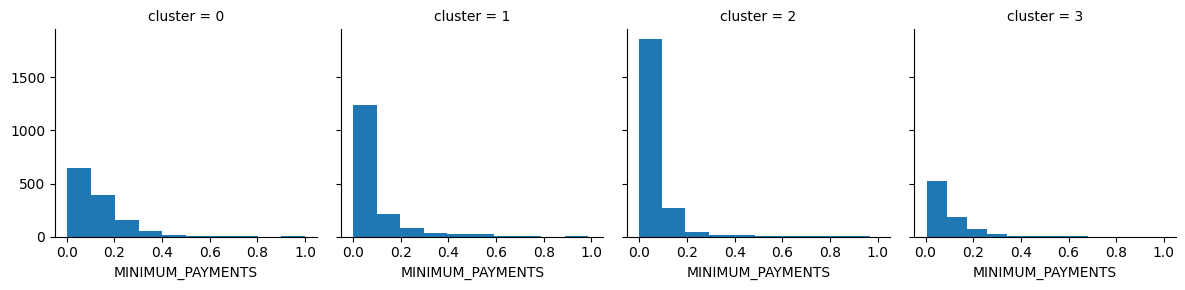

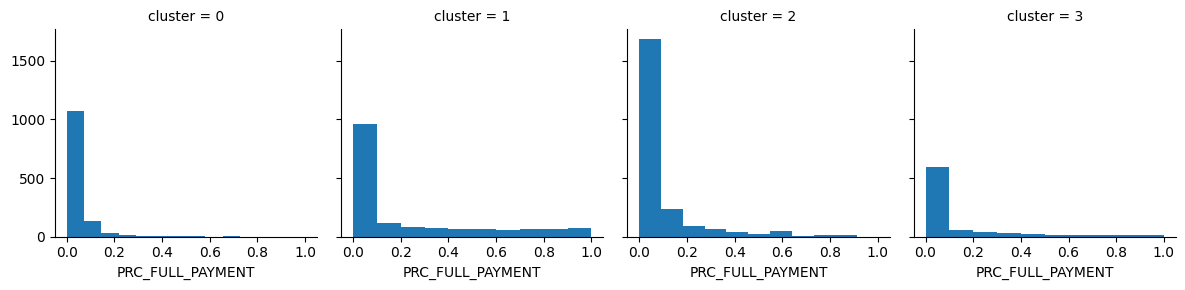

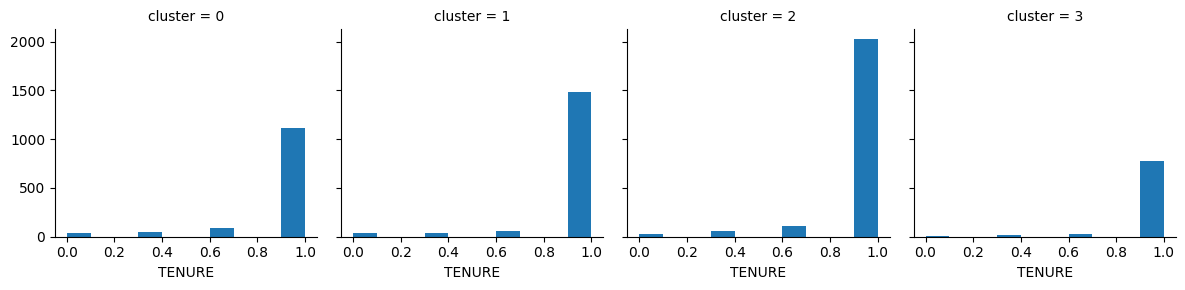

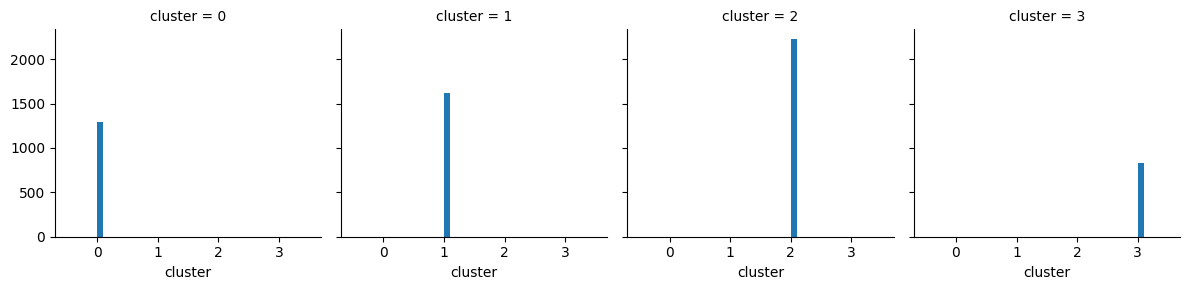

In [62]:
_df["cluster"] = cluster4

for c in _df:
    grid= sns.FacetGrid(_df, col='cluster')
    grid.map(plt.hist, c)

based on this we can create the following personas:
- cluster 0: tipically spend less on a purchase; tipically do not do onoff purchase; low number of transaction
- cluster 1: have low balance tipically; tipically spend less on a purchase; tipically do not do onoff purchase
- cluster 2: have low balance tipically; tipically spend less on a purchase; tipically do not do onoff purchase, low number of transaction
- cluster 4: have high amount of purchase (buys expensive stuff)

### DBSCAN

In [63]:
# this models handles outliers so we dont need to remove them

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
df = pd.read_csv(zf.open('CC_GENERAL.csv')).drop("CUST_ID", axis=1)
_df = StandardScaler().fit_transform(imput(df))

db = DBSCAN(eps=1.1, min_samples=10).fit(_df)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - int(-1 in labels)
n_noise_ = list(labels).count(-1)

n_clusters_

4

In [66]:
n_noise_ # number of outliers

3099

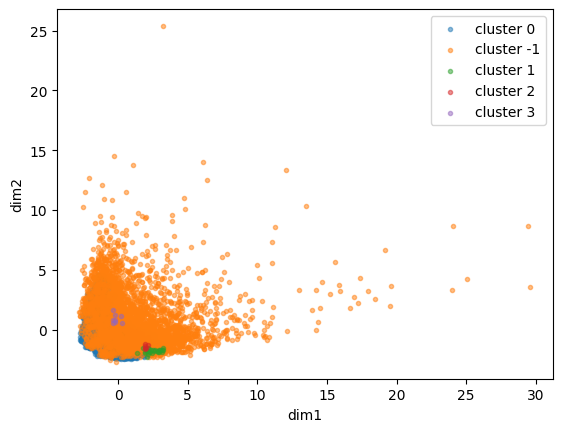

In [67]:
_df = pd.DataFrame(_df)
visualize_PCA(_df, scale=True, clusters=pd.Series(labels))

In [68]:
# this clustering is not so meaningful
# I played around of eps and min_samples, but got similar result
# my experience was that this dbscan was even sensitive to the type of scaling (hence is used Standardscaler)

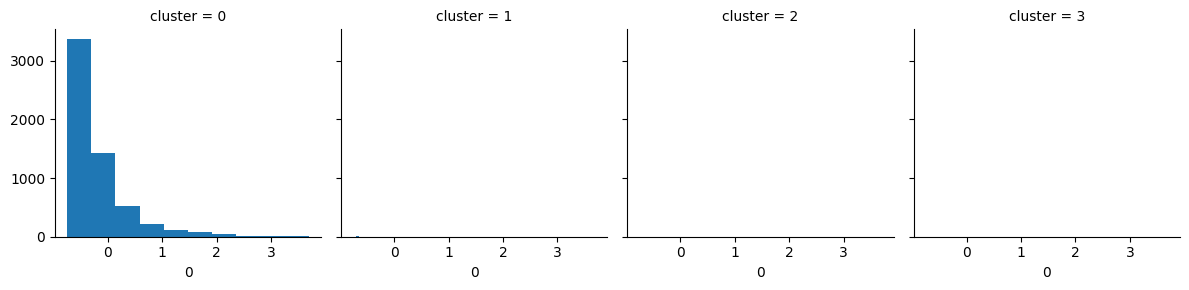

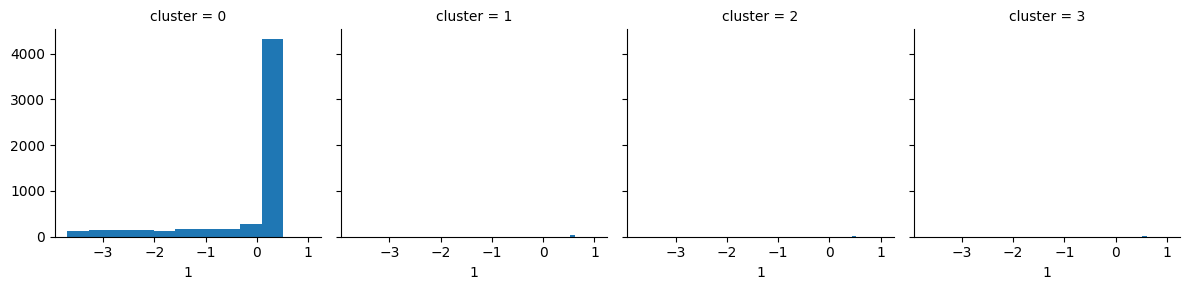

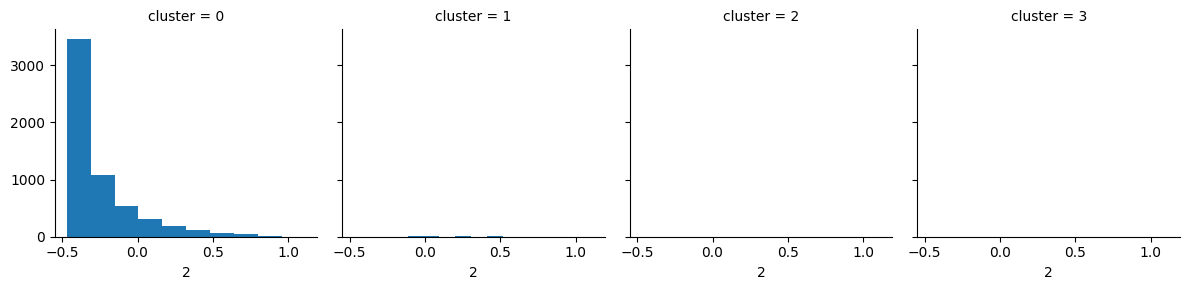

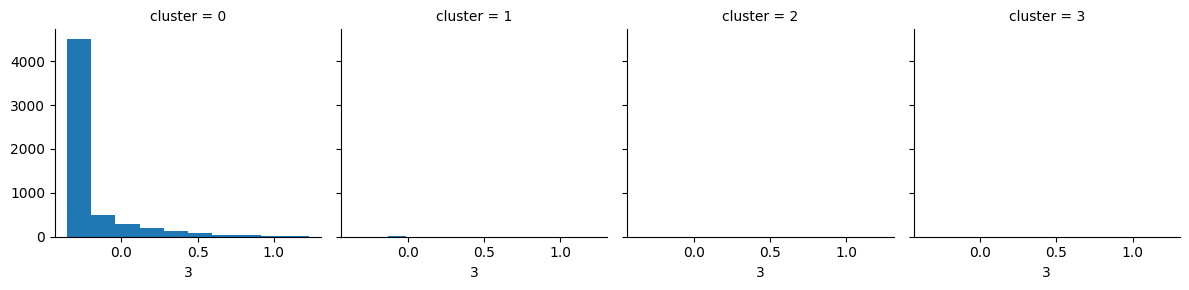

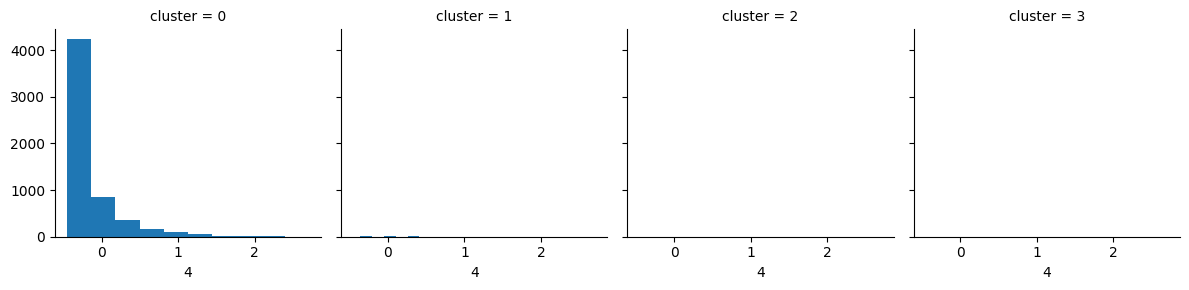

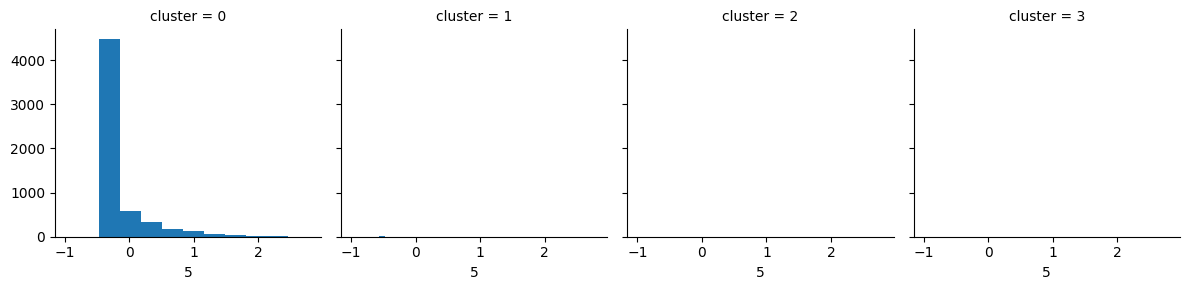

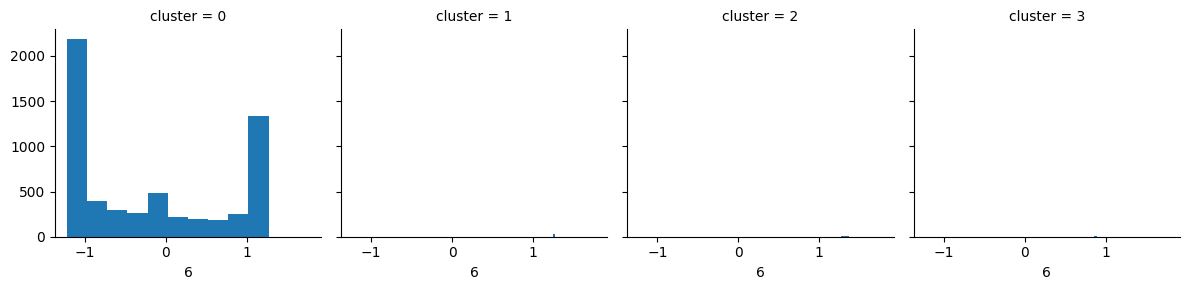

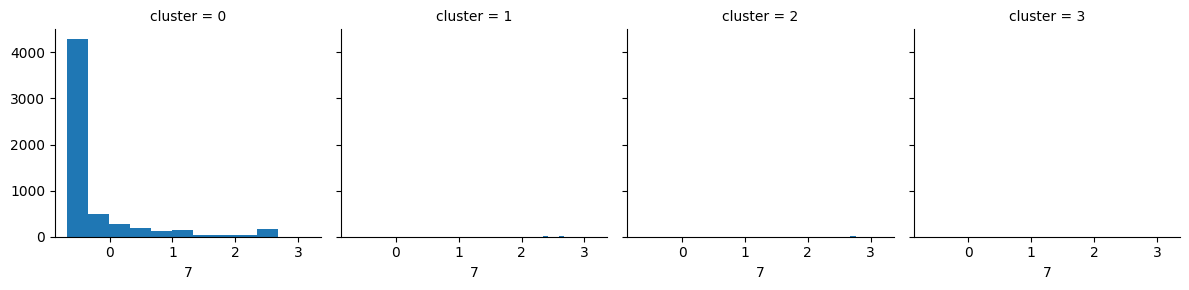

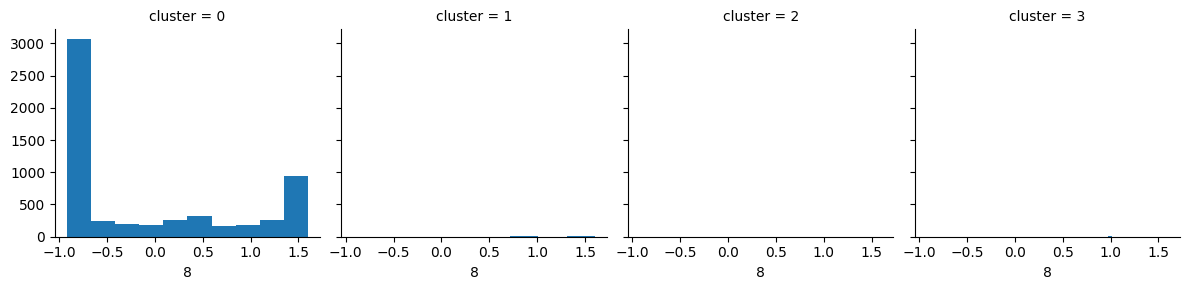

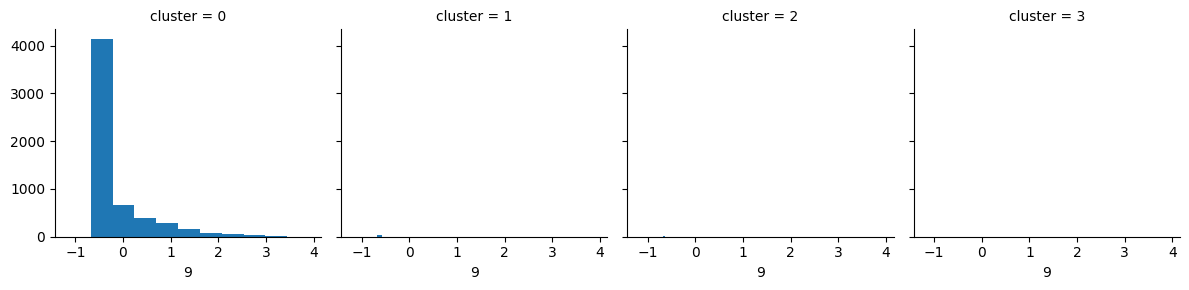

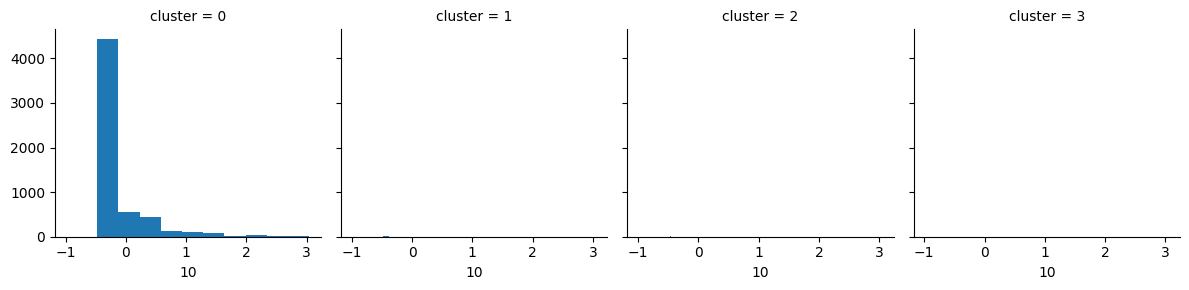

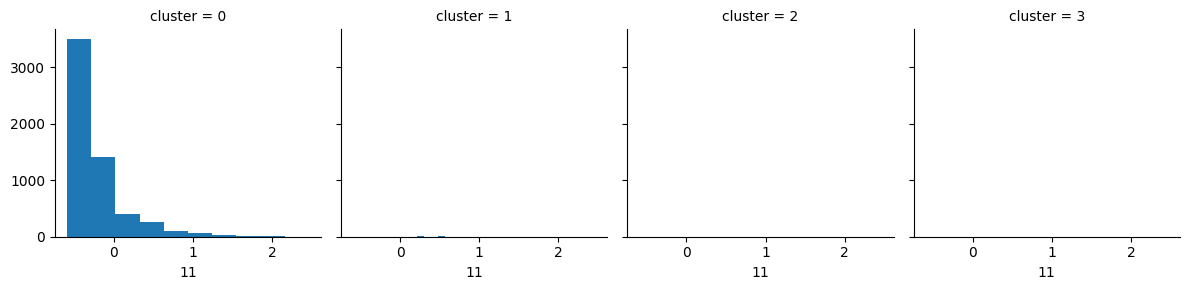

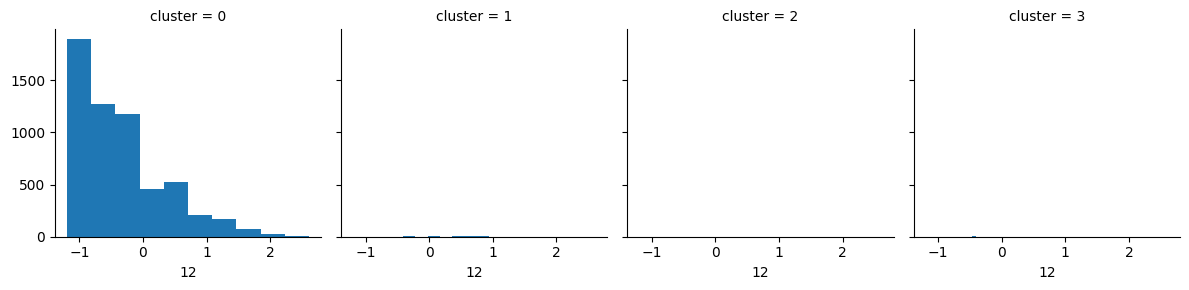

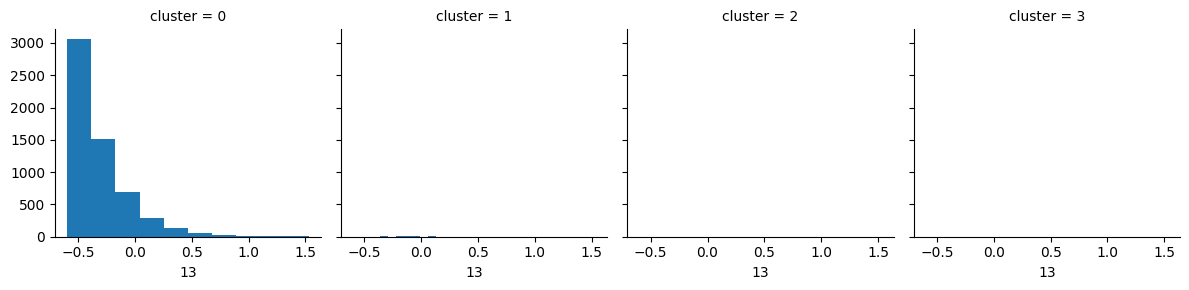

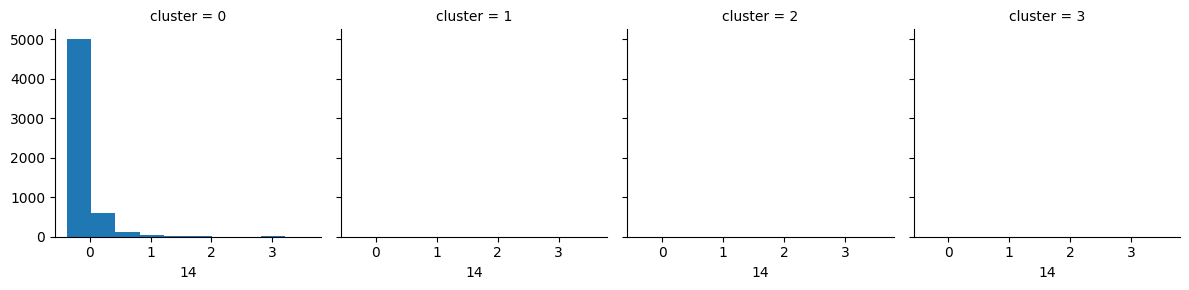

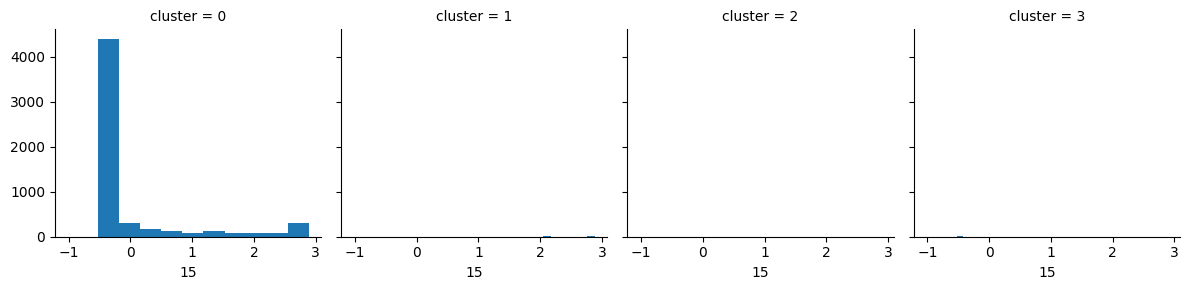

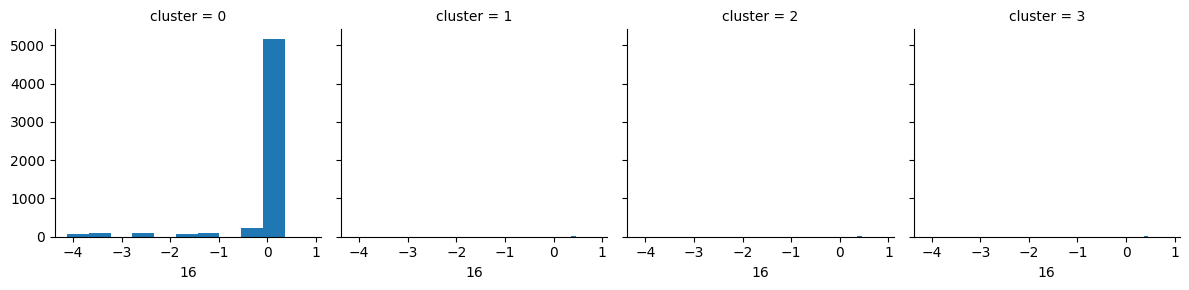

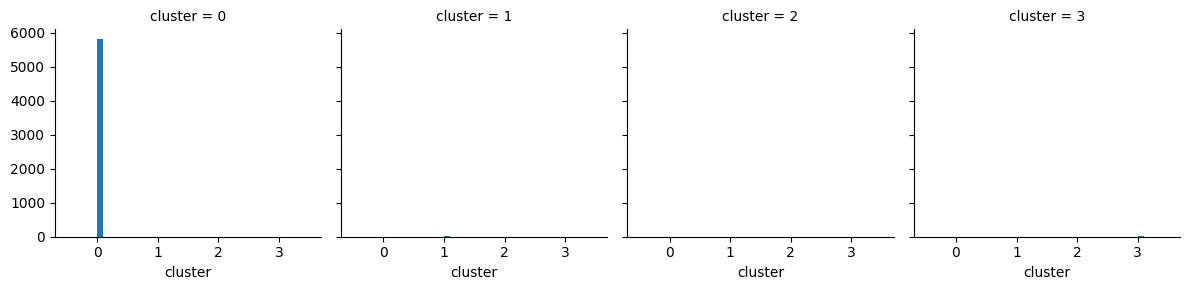

In [69]:
_df["cluster"] = labels
_df = _df.query("cluster != -1")

for c in _df:
    grid= sns.FacetGrid(_df, col='cluster')
    grid.map(plt.hist, c)

# Discussion

In this assignment, I worked on clustering credit card data to uncover patterns and group similar behaviors. The data was highly skewed, which made the task more challenging. I used two clustering techniques: K-Means and DBSCAN. I chose K-Means clustering primarily for its simplicity and effectiveness onlarge datasets. One important decision we made was to use only one (k) parameter. In an unsupervised learning task like this, it's tough to consider all parameters. 

The K-Means algorithm gave us some nice and interpretable results. It created distinct clusters of customers based on their credit card usage patterns. These clusters were easy to understand and could be directly applied to business strategies, such as targeted marketing or personalized offers. 

I also tried DBSCAN to get any additional insights. However, this method did not work well and/or needs further investigation. 